In [1]:
require(dplyr)
require(scales)
require(tidyverse)


d <- read.csv("comb-data.csv")
d <- d %>% filter(benchmark != "benchmarklibpcap_fuzz_both") %>% filter(fuzzer != "honggfuzz")
d$coverage_inc <- d$edges_covered - d$initial_coverage
# d$cif <- factor(d$coverage_inc, ordered=TRUE)
static_cols <- c("total_shared", "total_eq", "total_ineq", "total_indir", "bin_text_size")

statics <- na.omit(unique(d[c(static_cols, c("benchmark"))]))

d <- d %>% filter(benchmark != "lcms-2017-03-21")
cols <- c("benchmark", "fuzzer", "corpus_size",
                "initial_coverage", "ineq_reached", "ineq_unexplored",
                "indir_reached", "shared_reached", "mean_exec_ns",
                "mean_size_bytes", "coverage_inc", "eq_reached", "eq_unexplored",
                 "edges_covered", "per_target_trial")
d <- d[cols]
d$mean_exec_ms = d$mean_exec_ns / 1000000

d$ineq_unex_perc <- d$ineq_unexplored / d$initial_coverage

scaled_d <- d %>%
    mutate_if(is.numeric, rescale)
scaled_d$coverage_inc_unscaled <- d$coverage_inc 
scaled_d <- scaled_d %>% drop_na() %>% as.data.frame



d_statics <- merge(x = d, y = statics, by = "benchmark", all.x = TRUE)
mec <- d %>% group_by(benchmark) %>% summarise(max(edges_covered))
d_statics <- merge(x = d_statics, y = mec, by = "benchmark", all.x = TRUE)
head(d_statics)
head(d)
dim(d)
dim(d_statics)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: scales

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()



,benchmark,fuzzer,corpus_size,initial_coverage,ineq_reached,ineq_unexplored,indir_reached,shared_reached,mean_exec_ns,mean_size_bytes,⋯,edges_covered,per_target_trial,mean_exec_ms,ineq_unex_perc,total_shared,total_eq,total_ineq,total_indir,bin_text_size,max(edges_covered)
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,bloaty_fuzz_target,afl,NA,6261,NA,NA,NA,NA,NA,NA,⋯,6579,NA,NA,NA,5358,48128,17613,2283,8835,7155
2,bloaty_fuzz_target,entropic,144,6202,2056,1549,69,0,7838127,13428.951,⋯,6880,9,7.838127,0.2497581,5358,48128,17613,2283,8835,7155
3,bloaty_fuzz_target,libfuzzer,66,5628,1688,1313,67,0,11249420,20523.636,⋯,6003,17,11.249420,0.2332978,5358,48128,17613,2283,8835,7155
4,bloaty_fuzz_target,afl,71,5423,1625,1223,58,0,10180785,7671.028,⋯,5893,1,10.180785,0.2255209,5358,48128,17613,2283,8835,7155
5,bloaty_fuzz_target,entropic,24,4684,1369,1135,53,0,6887490,4516.167,⋯,5975,10,6.887490,0.2423143,5358,48128,17613,2283,8835,7155
6,bloaty_fuzz_target,libfuzzer,140,6196,2026,1542,69,0,8583006,17151.714,⋯,6549,18,8.583006,0.2488702,5358,48128,17613,2283,8835,7155


,benchmark,fuzzer,corpus_size,initial_coverage,ineq_reached,ineq_unexplored,indir_reached,shared_reached,mean_exec_ns,mean_size_bytes,coverage_inc,eq_reached,eq_unexplored,edges_covered,per_target_trial,mean_exec_ms,ineq_unex_perc
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,harfbuzz-1.3.2,afl,32,4241,1332,1061,23,0,7572578,15990.03125,2395,1839,1280,6636,0,7.572578,0.2501768
2,libjpeg-turbo-07-2017,afl,20,1387,454,381,10,0,6116574,55.20000,637,876,661,2024,0,6.116574,0.2746936
3,libpcap_fuzz_both,afl,46,1441,310,238,32,0,9454725,41.30435,1199,1261,859,2640,0,9.454725,0.1651631
4,libpng-1.2.56,afl,38,752,203,165,7,0,5636336,94351.86842,142,676,559,894,0,5.636336,0.2194149
5,libxslt_xpath,afl,139,7856,1546,1093,68,0,7088809,3660.50360,1220,4111,3176,9076,0,7.088809,0.1391293
6,mbedtls_fuzz_dtlsclient,afl,20,2217,566,462,22,0,7130626,389.85000,526,1510,1266,2743,0,7.130626,0.2083897


[1] 1152   17

[1] 1152   23

In [2]:

# This warning is misleading, they are scaled by group
group_scaled_d <- d %>% group_by(benchmark) %>%
    mutate_if(is.numeric, rescale) %>% ungroup

group_scaled_d$coverage_inc_unscaled <- d$coverage_inc 
scaled_d <- scaled_d %>% drop_na() %>% as.data.frame

`mutate_if()` ignored the following grouping variables:
• Column `benchmark`


In [3]:
ranks = c()

ranker = function(d) {

for (rown in 1:nrow(d)) {
    rank = NA
    for (rown_inner in 1:nrow(d)) {
        if (d[rown, "initial_coverage"] == d[rown_inner, "initial_coverage"] &&
            d[rown, "corpus_size"] == d[rown_inner, "corpus_size"] &&
            d[rown, "benchmark"] == d[rown_inner, "benchmark"] &&
            d[rown, "fuzzer"] != d[rown_inner, "fuzzer"]) {
            if (is.na(rank)) {
                rank <- 1
            }
            if (d[rown, "coverage_inc"] < d[rown_inner, "coverage_inc"]) {
                rank <- rank + 1
            }
        }
    }
    ranks[rown] = rank
}
    ranks
}
d <- d %>% drop_na()
ranks <- ranker(d)
d$per_trial_ranks <- factor(ranks, ordered=TRUE)
d$per_trial_ranks_numeric <- ranks

scaled_d <- scaled_d %>% drop_na()
ranks <- ranker(scaled_d)
scaled_d$per_trial_ranks <- factor(ranks, ordered=TRUE)
scaled_d$per_trial_ranks_numeric <- ranks

group_scaled_d <- group_scaled_d %>% drop_na()
ranks <- ranker(group_scaled_d)
group_scaled_d$per_trial_ranks <- factor(ranks, ordered=TRUE)
group_scaled_d$per_trial_ranks_numeric <- ranks




`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 232 rows containing non-finite values (stat_smooth).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 12. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 851 rows containing missing values (geom_point).”


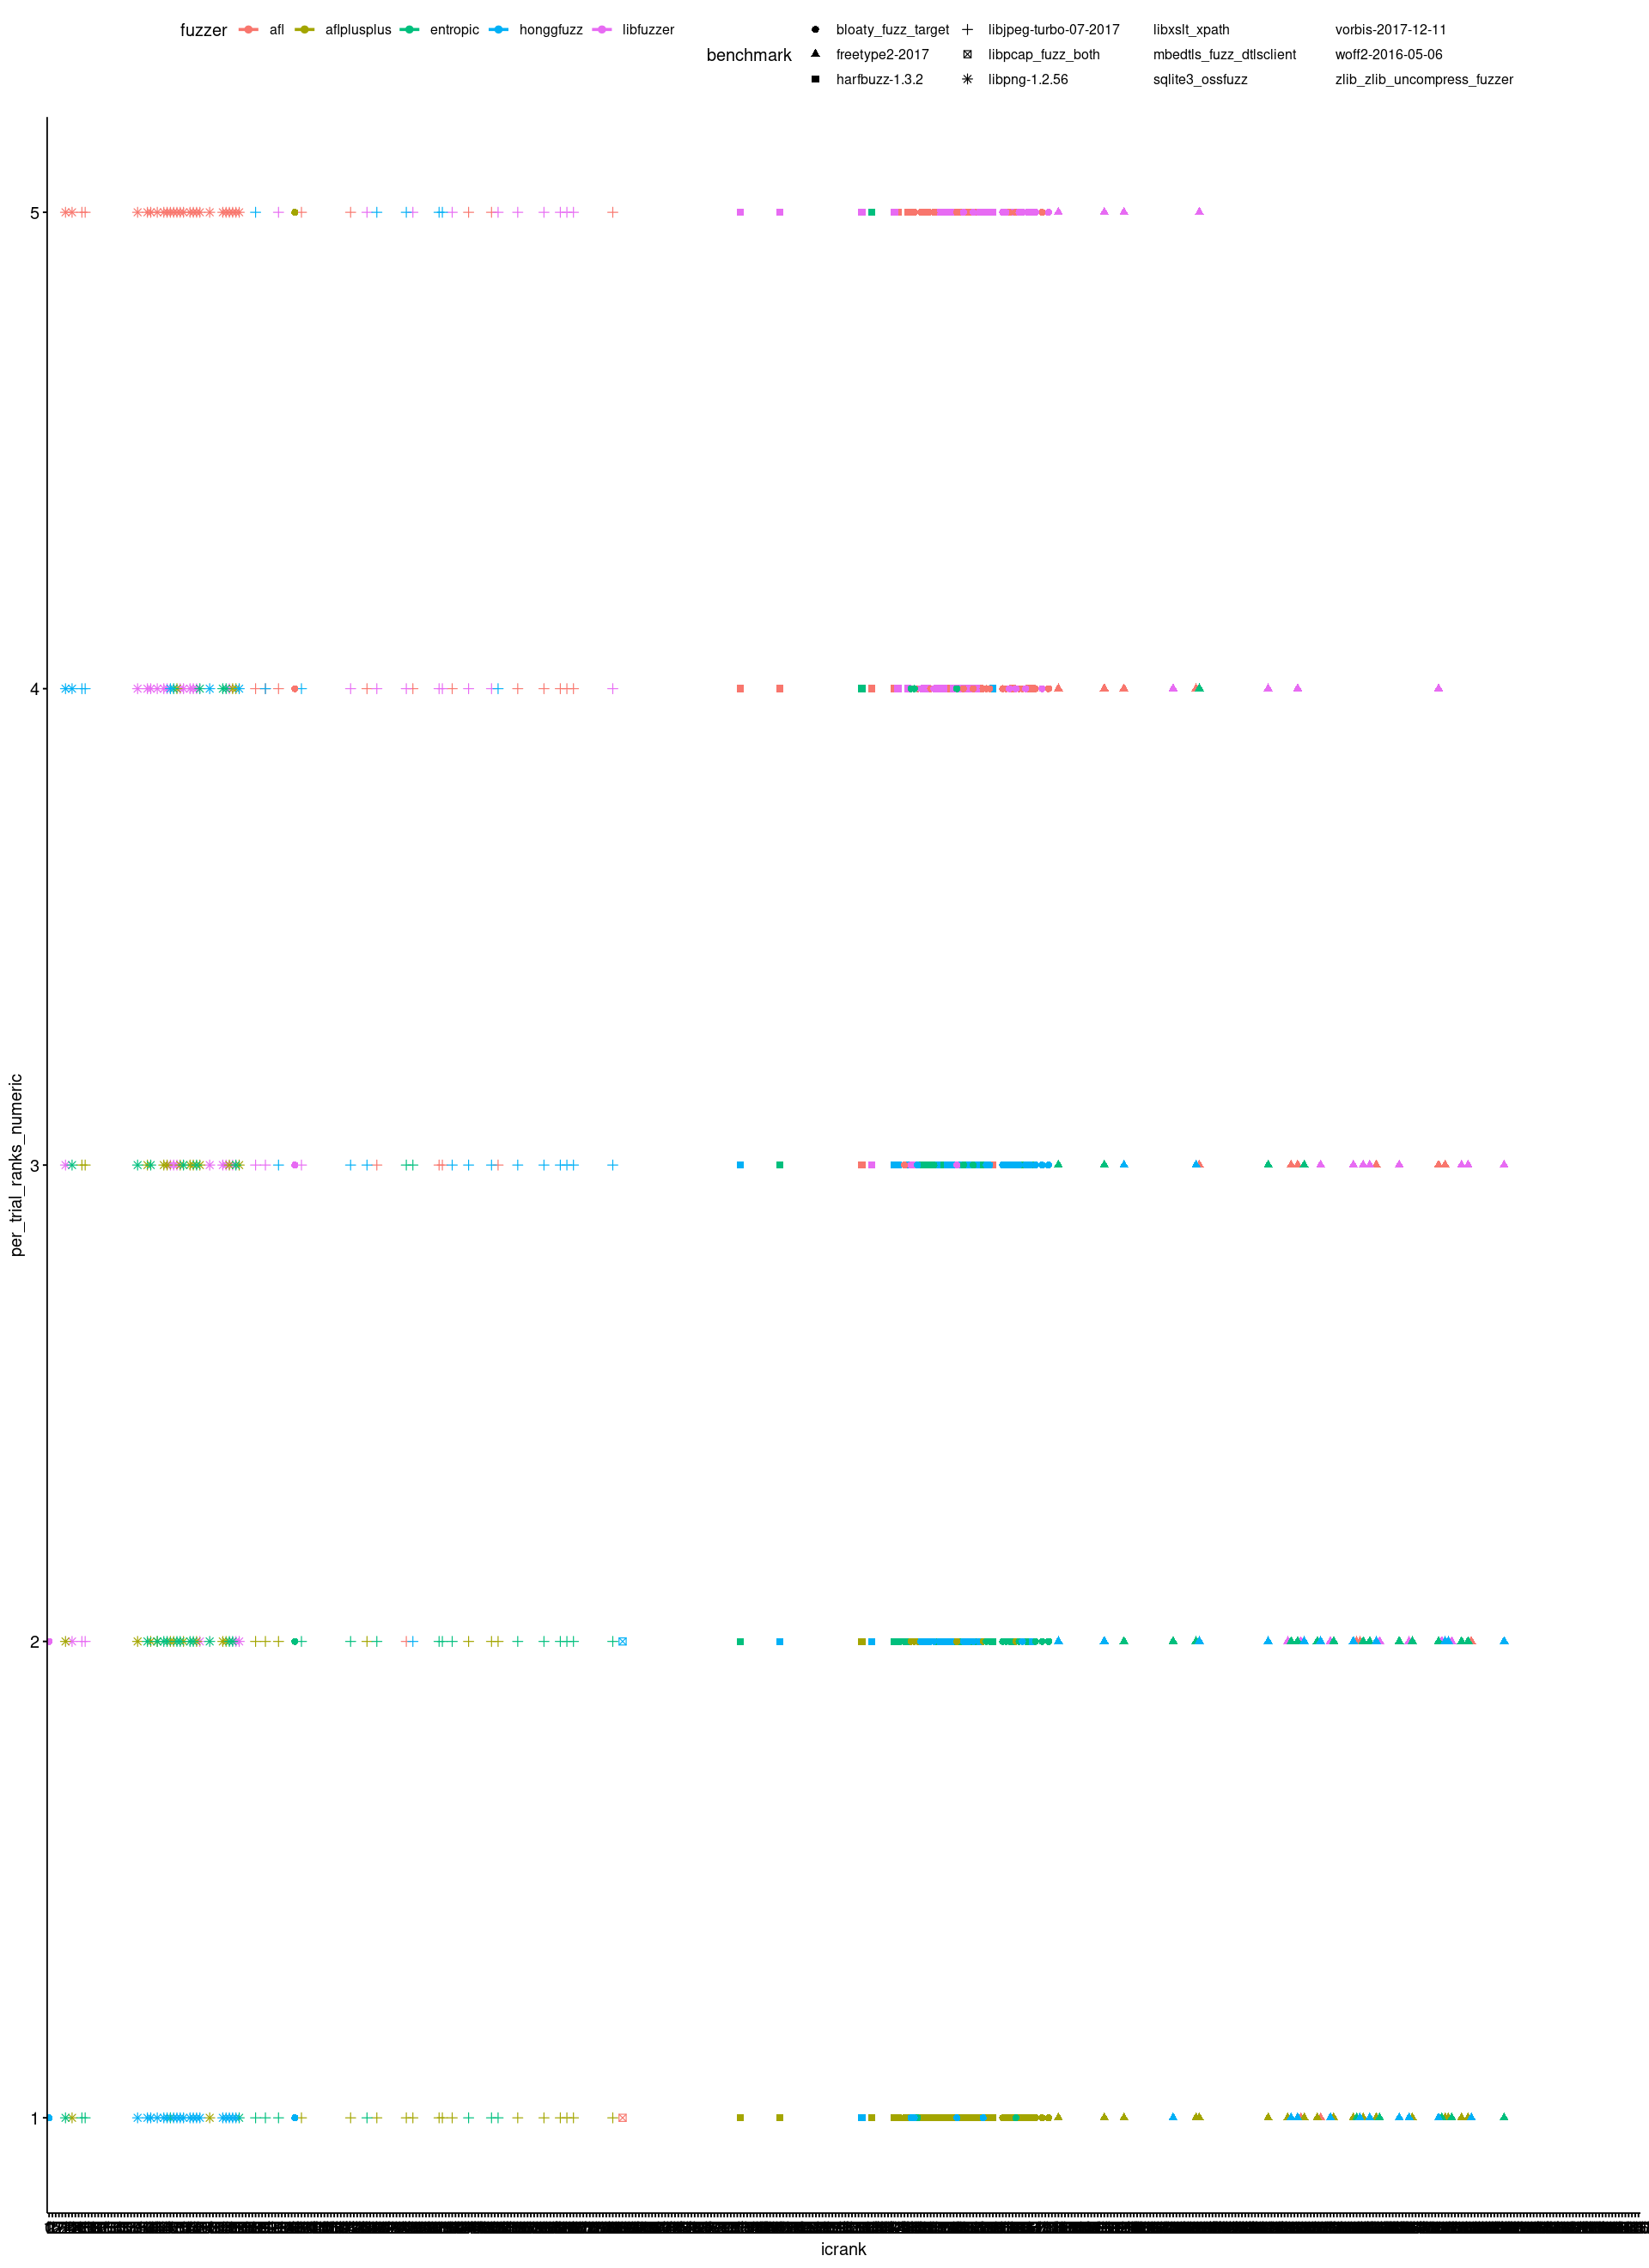

In [12]:
library(ggpubr)



options(repr.plot.width=16, repr.plot.height=22)
d$icrank <- factor(d$initial_coverage, ordered=TRUE)

ggscatter(
  d, x = "icrank", y = "per_trial_ranks_numeric",
  color = "fuzzer", shape="benchmark", add = "reg.line")
# + facet_wrap(benchmark ~ ., scales = "free", ncol=3)


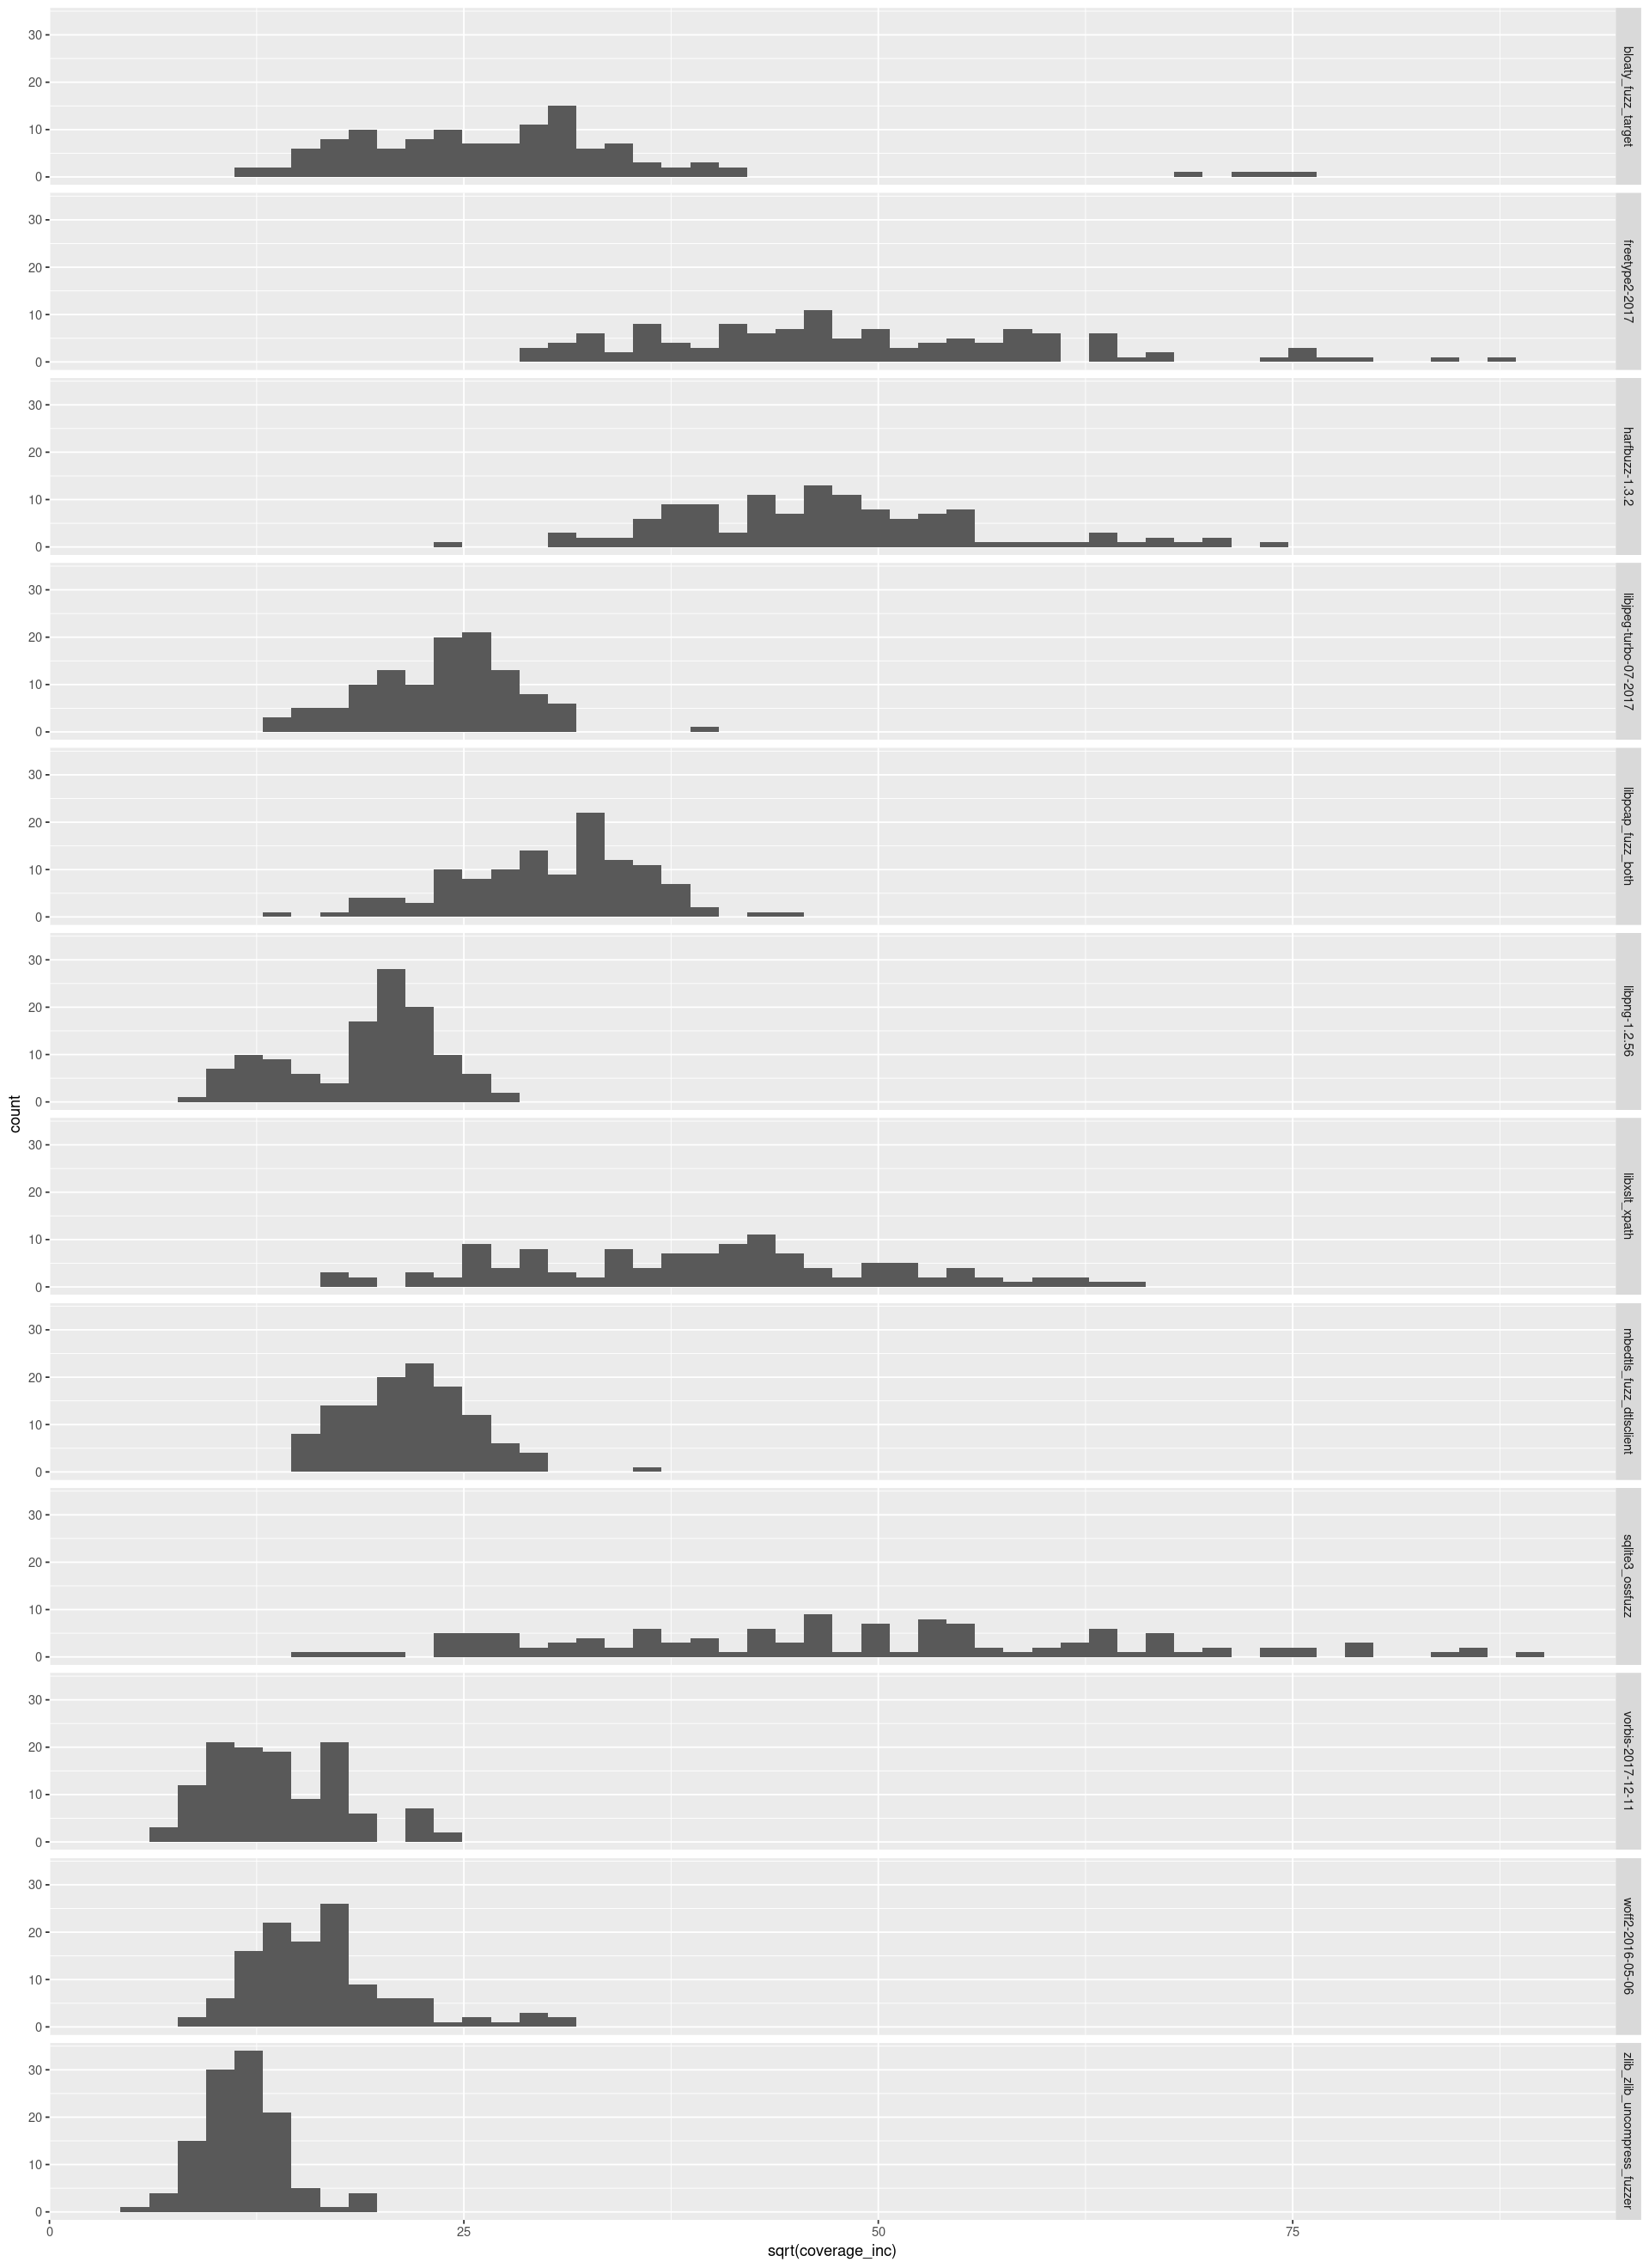

In [47]:
library("ggplot2")

ggp <- ggplot(d, aes(sqrt(coverage_inc))) + geom_histogram(bins=50)
ggp + facet_grid(benchmark ~ .) 

`geom_smooth()` using formula 'y ~ x'



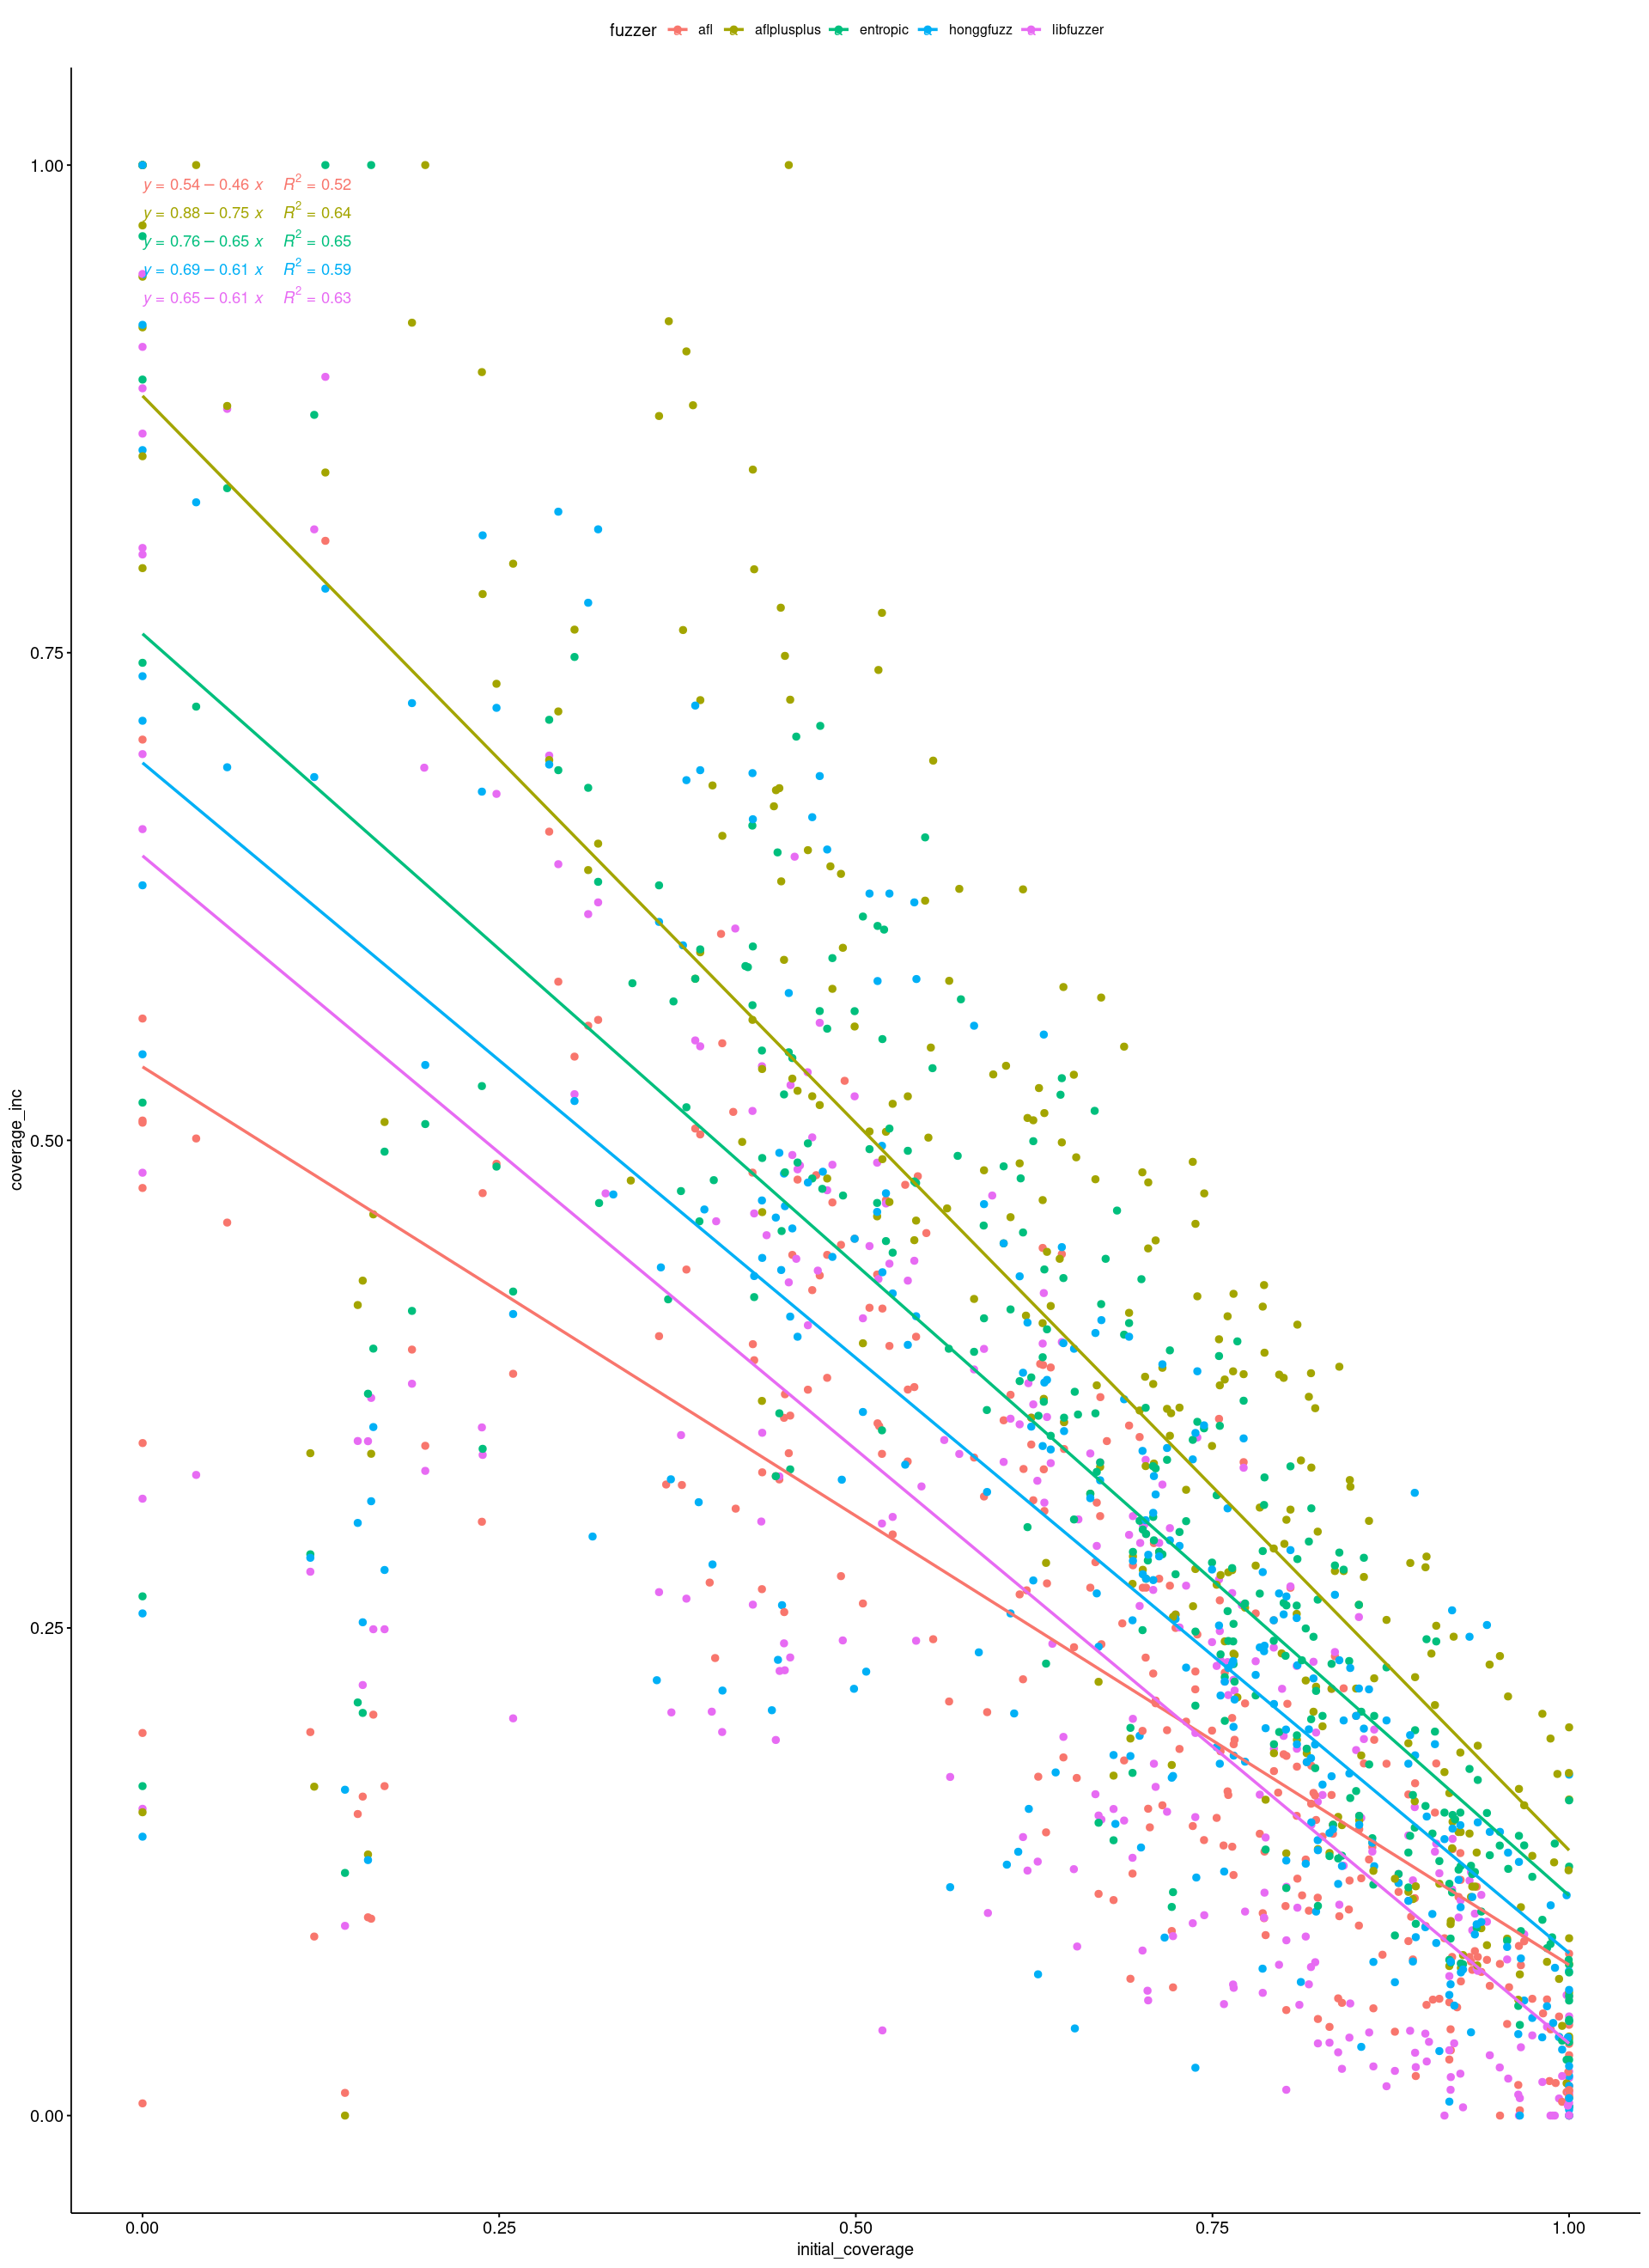

In [41]:
library(ggpubr)



options(repr.plot.width=16, repr.plot.height=22)

ggscatter(
  group_scaled_d, x = "initial_coverage", y = "coverage_inc",
  color = "fuzzer", add = "reg.line") + stat_regline_equation(
      aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = fuzzer)) # + facet_wrap(benchmark ~ ., scales="free")

`geom_smooth()` using formula 'y ~ x'



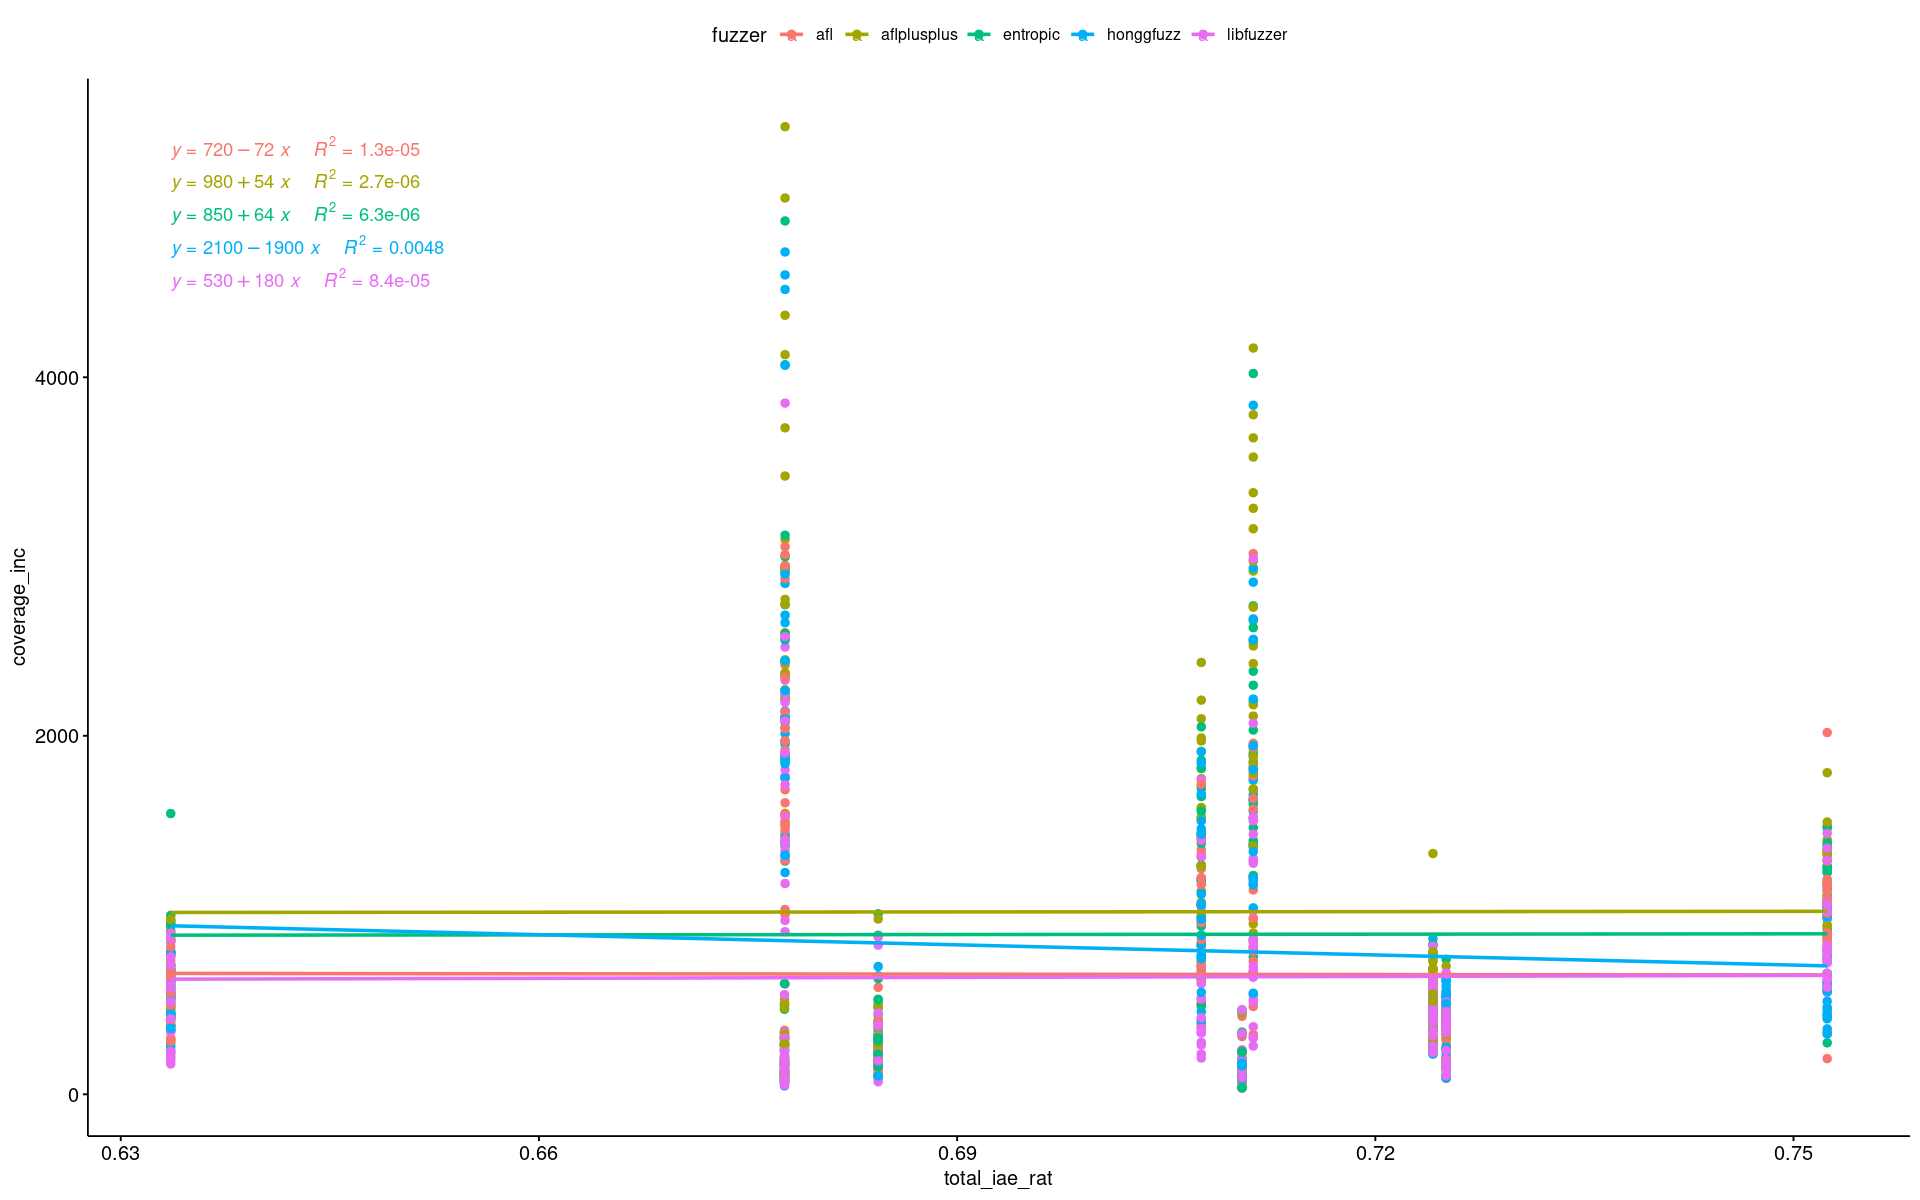

In [54]:
library(ggpubr)

d_statics$total_ie_rat <- d_statics$total_ineq / d_statics$total_eq
d_statics$approx_edges <-  (d_statics$total_eq + d_statics$total_ineq + d_statics$total_indir)
d_statics$total_iae_rat <- d_statics$total_eq / d_statics$approx_edges
d_statics$total_ib_rat <- d_statics$total_indir / d_statics$bin_text_size


ggscatter(
  d_statics, x = "total_iae_rat", y = "coverage_inc",
  color = "fuzzer", add = "reg.line") + stat_regline_equation(
      aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = fuzzer)) 

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 5 rows containing missing values”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning

Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 5 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 5 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 5 rows containin

Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 5 rows containing missing values”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute e

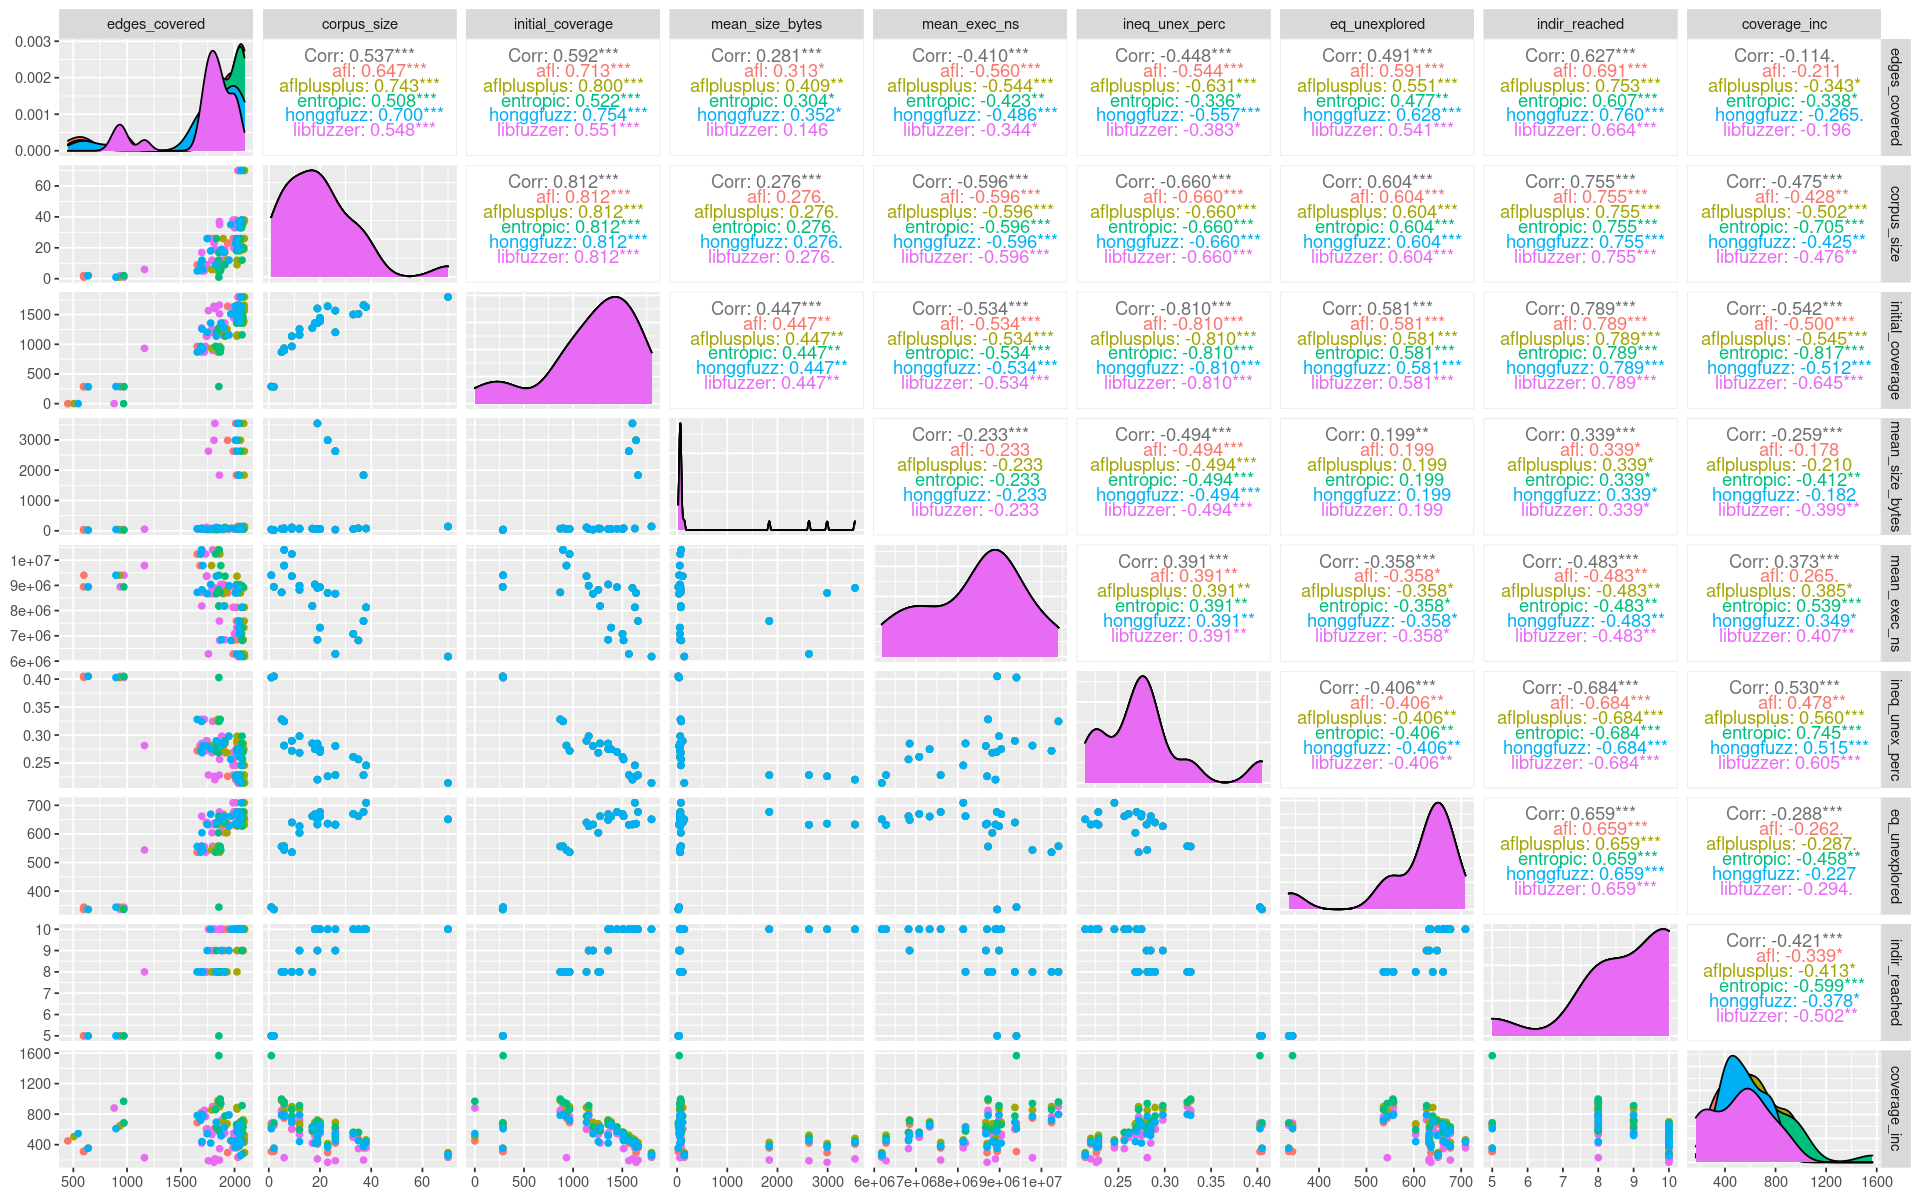

In [22]:
# install.packages("GGally")

library(GGally)
library(repr)

options(repr.plot.width=16, repr.plot.height=10)
vars = c("edges_covered", "corpus_size", "initial_coverage", "mean_size_bytes", "mean_exec_ns", "ineq_unex_perc", "eq_unexplored", "indir_reached", "coverage_inc" )

# display a pairplot of all four columns of data
GGally::ggpairs(d %>% filter(benchmark == "libjpeg-turbo-07-2017"), columns = vars, ggplot2::aes(color = fuzzer), upper = list(continuous = wrap("cor", method = "kendall")))

In [ ]:
# install.packages("tidyverse")
# install.packages("ggpubr")
# install.packages("rstatix")
# install.packages("broom")
library(tidyverse)
library(rstatix)
library(broom)

In [ ]:
library(ggpubr)
# Assumption 1 (ANCOVA): Visually check for  linear relationship between covariate and output 
ggscatter(
  d[d$benchmark == "bloaty_fuzz_target",], x = "ineq_unexplored", y = "coverage_inc",
  color = "fuzzer", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = fuzzer)
    )


In [ ]:
sample_fb <- read.csv("sample-report.csv")
require(dplyr)
max <- sample_fb %>% group_by(trial_id) %>% summarise(edges_covered = max(edges_covered))
max <- unique(left_join(max, sample_fb[c("trial_id", "benchmark", "fuzzer")], by = c("trial_id")))

norm_tests <- aggregate(formula = edges_covered ~ benchmark + fuzzer,
          data = max,
          FUN = function(x) { tryCatch({
              y <- shapiro.test(x); c(y$statistic, y$p.value)
            }, error = function(e) {
               c(0,0)
            }
          )})
norm_tests

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




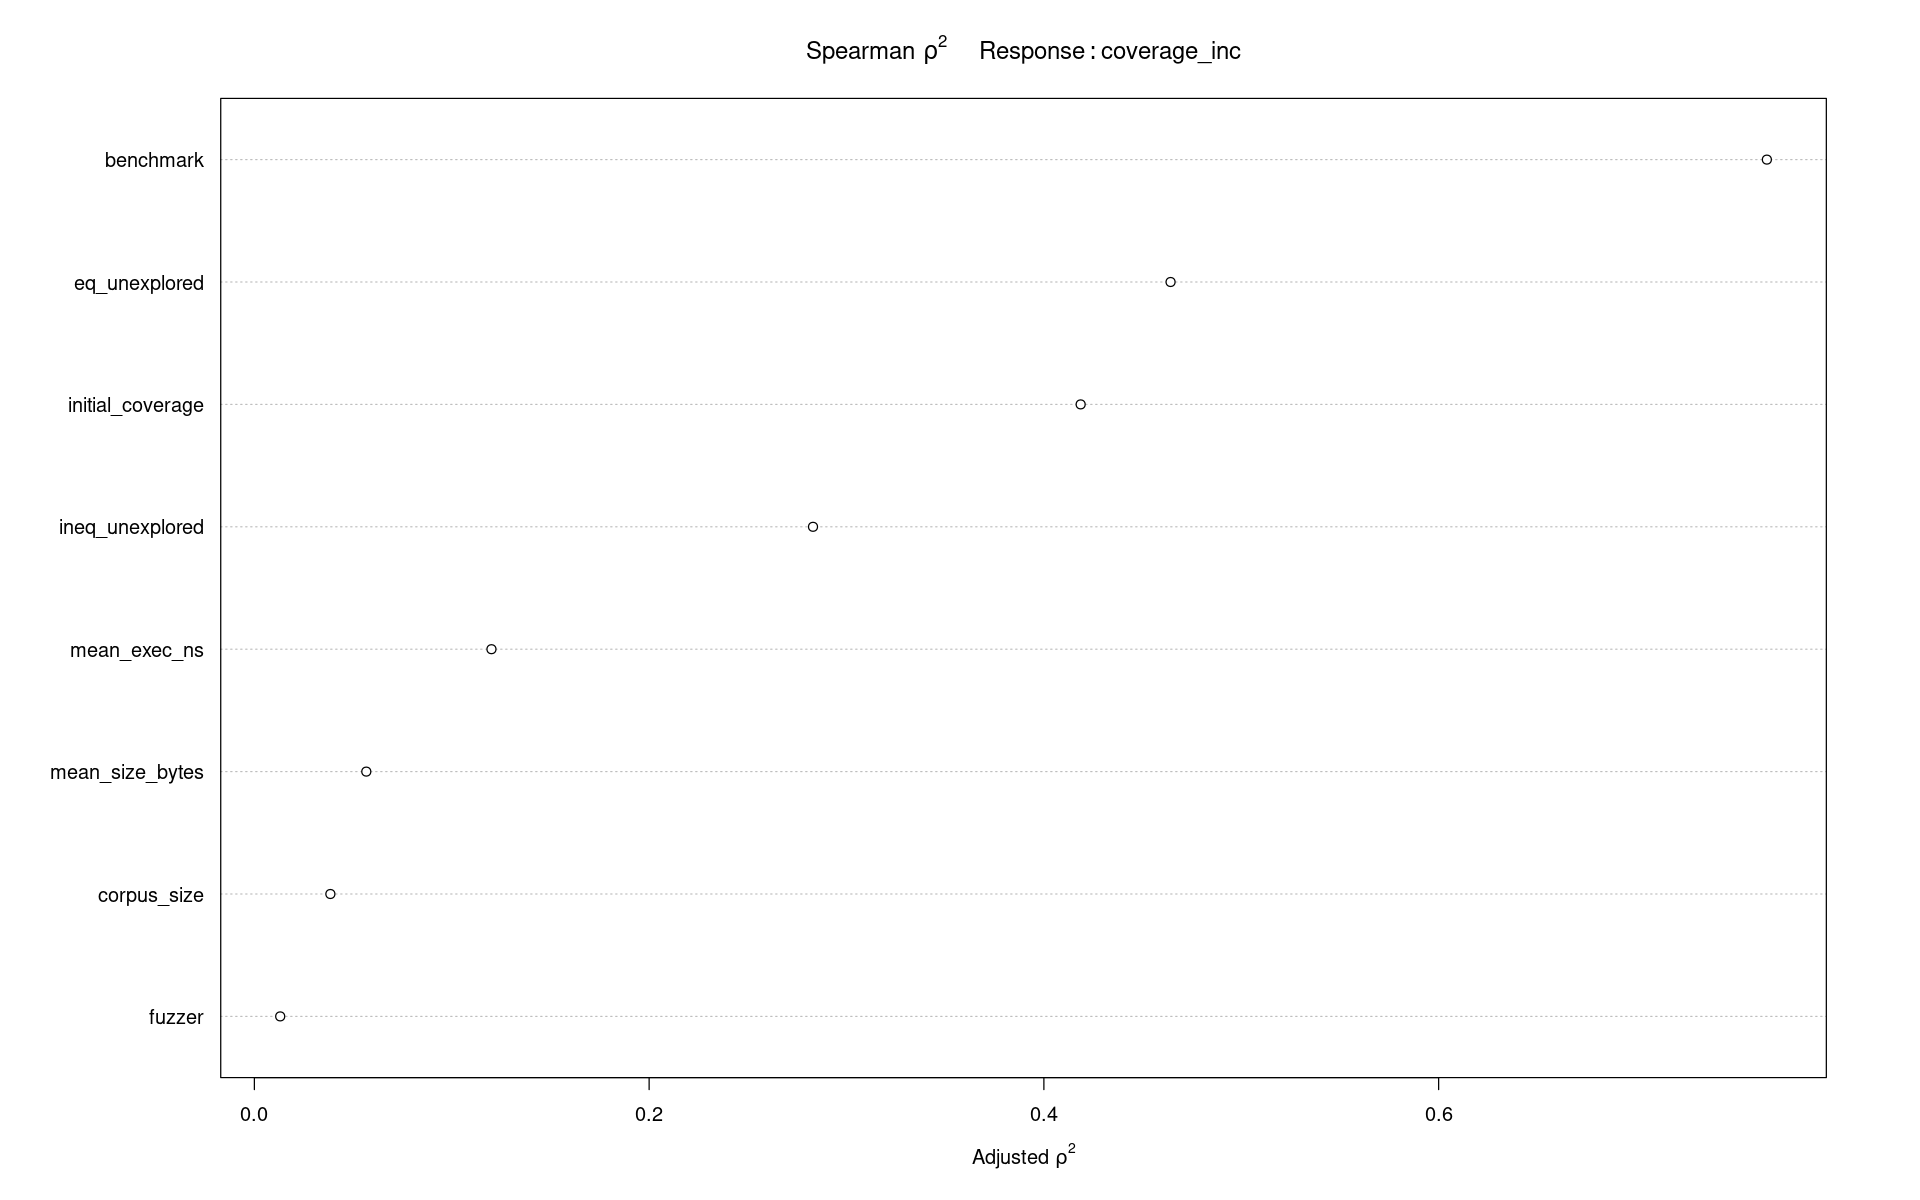

In [15]:
library("rms")

rms_d <- d

s <- spearman2(coverage_inc ~ corpus_size + initial_coverage +
               mean_size_bytes + mean_exec_ns + ineq_unexplored +
               eq_unexplored + fuzzer + benchmark, data=rms_d)
plot(s)

In [ ]:
v <- varclus(~ corpus_size + initial_coverage +
               mean_size_bytes + mean_exec_ns + ineq_unexplored +
               eq_unexplored + fuzzer + benchmark, data=rms_d)
plot(v)

In [ ]:
require("rms")

model <- orm(formula = coverage_inc ~ benchmark + fuzzer + initial_coverage, data = d)
model
AIC(model)

In [160]:
require(dplyr)
require(purrr)
require(plyr)



corellation <- function(y, x) {
    t <- cor.test(y, x, method = "spearman")
  
    if (is.finite(t$p.value)) {

        t$estimate
    } else {
        rv <- NA
        names(rv)[0] <- "rho"
        rv
    }
}

acc_coefs <- function(f, notused) { 
    g <- f %>% group_by(benchmark) %>%
        group_map(
            ~ c(corellation(.x$mean_exec_ns, .x$coverage_inc), .x$benchmark[1]),
            .keep = TRUE
        ) %>% bind_rows()

    g
}

res <- d %>% group_by(fuzzer) %>%
        group_map(
            ~ acc_coefs(.x, 0) %>% add_column(fuzz = .x$fuzzer[1]),
            .keep = TRUE
        ) %>% bind_rows() 

names(res)[2] <- 'bench'
res$rho <- as.numeric(res$rho)
res



Warning message in cor.test.default(y, x, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(y, x, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(y, x, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(y, x, method = "spearman"):
“Cannot compute exact p-value with ties”
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
New names:
• `` -> `...2`
Warning message in cor.test.default(y, x, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(y, x, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(y, x, method = "spearm

rho,bench,fuzz
<dbl>,<chr>,<chr>
-0.740118577,bloaty_fuzz_target,afl
0.194782609,freetype2-2017,afl
-0.003478261,harfbuzz-1.3.2,afl
-0.248023715,libjpeg-turbo-07-2017,afl
-0.289565217,libpcap_fuzz_both,afl
-0.397999168,libpng-1.2.56,afl
-0.350434783,libxslt_xpath,afl
-0.288386282,mbedtls_fuzz_dtlsclient,afl
-0.603478261,sqlite3_ossfuzz,afl


Warning message:
“Removed 24 rows containing missing values (geom_bar).”
Warning message:
“Removed 24 rows containing missing values (geom_bar).”


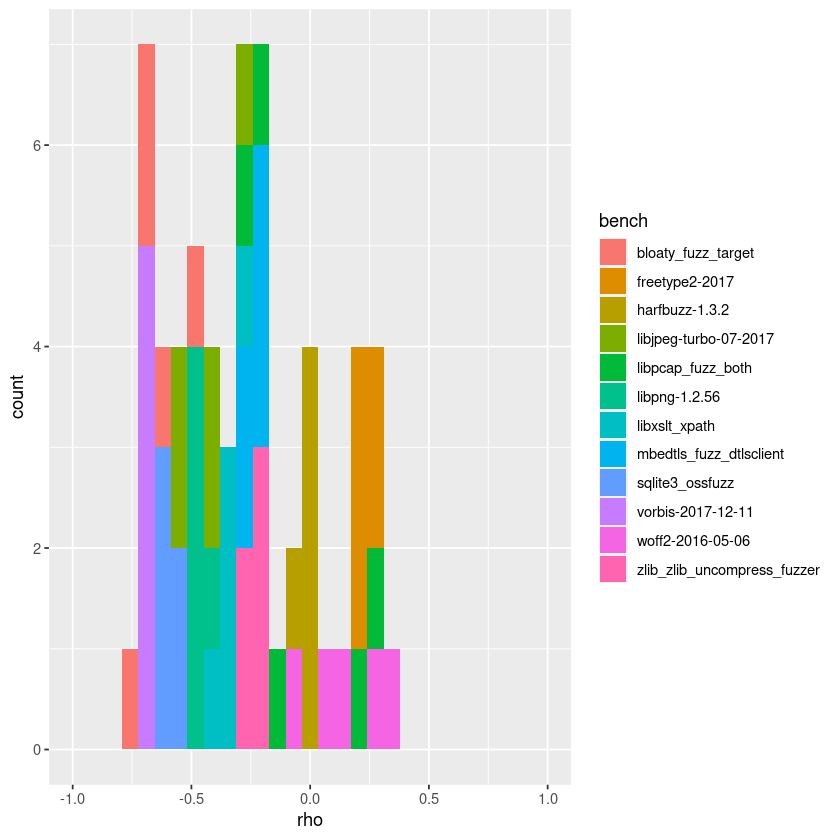

Warning message:
“Removed 10 rows containing missing values (geom_bar).”


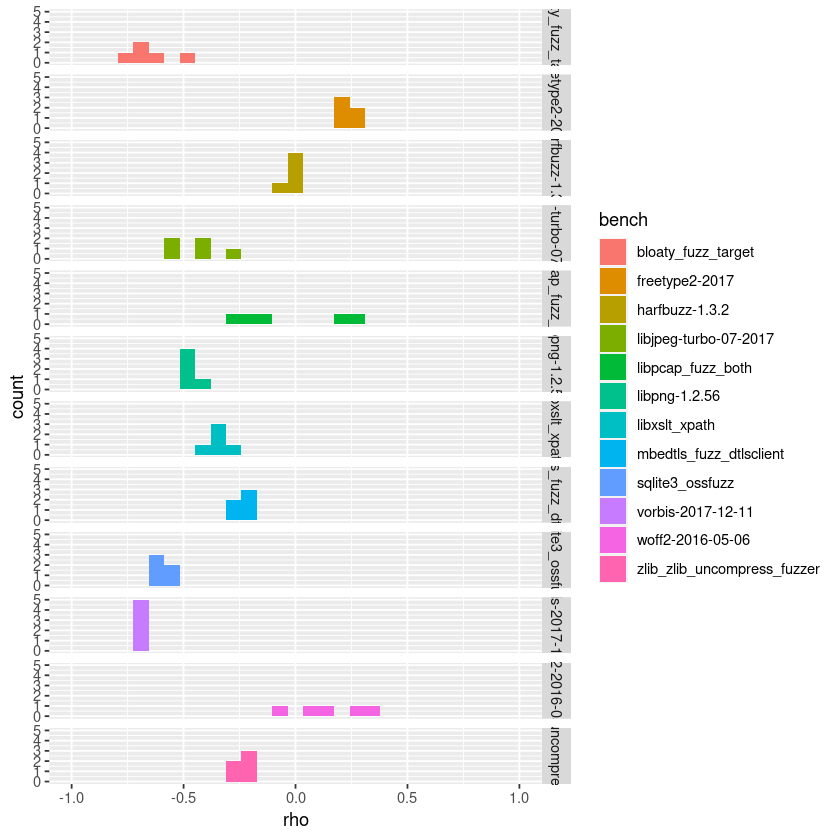

Warning message:
“Removed 10 rows containing missing values (geom_bar).”


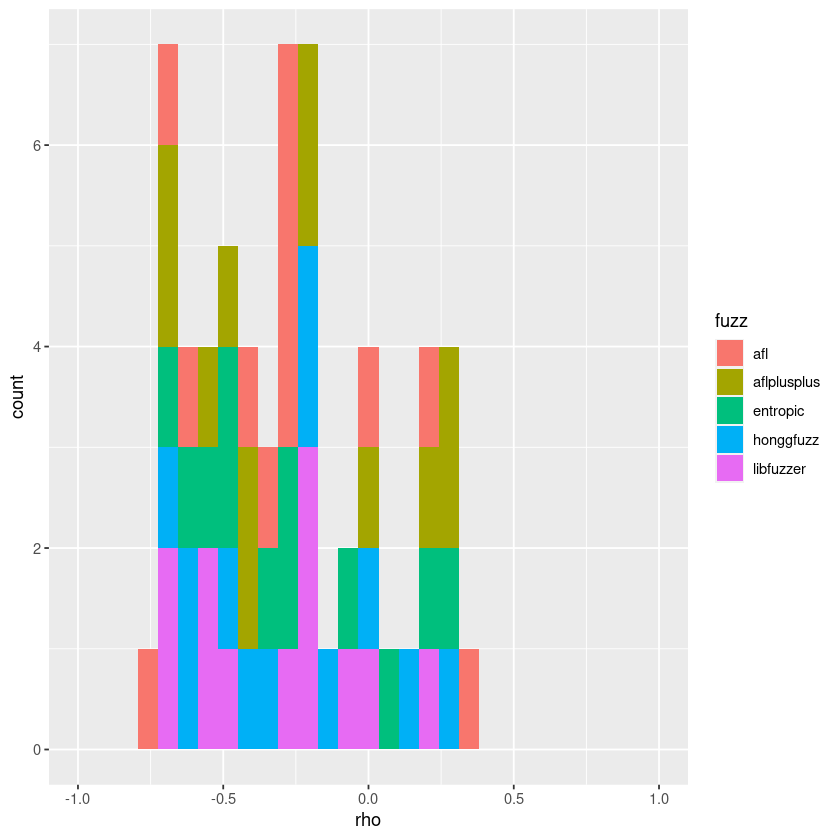

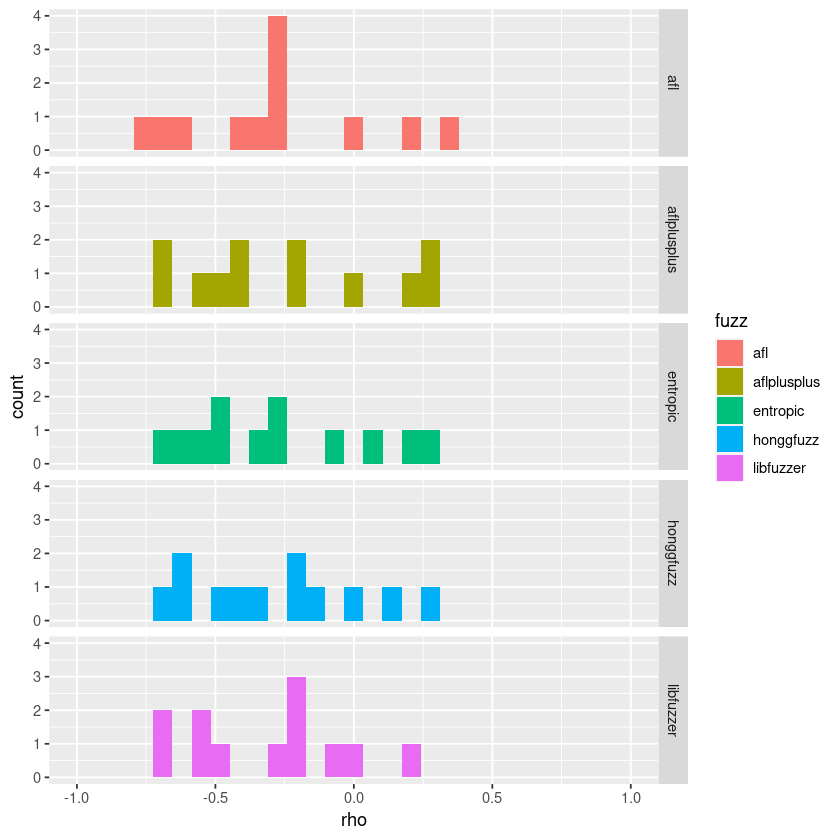

In [161]:
ggp <- ggplot(res, aes(rho, fill = bench)) + geom_histogram(bins=30)
ggp + xlim(-1, 1)
ggp + facet_grid(bench ~ .) + xlim(-1, 1)
ggp2 <- ggplot(res, aes(rho, fill = fuzz)) + geom_histogram(bins=30)
ggp2 + xlim(-1, 1)
ggp2 + facet_grid(fuzz ~ .) + xlim(-1, 1)

# Mixed Effects Model

In [ ]:
library(lme4)

model <- glmer(formula = sqrt(coverage_inc) ~ benchmark + fuzzer + (1 | mean_size_bytes) +
              (1 | initial_coverage) + fuzzer*benchmark +
              (1 | mean_exec_ns), data = d)
model

In [ ]:
plot(model)
qqnorm(resid(model))
qqline(resid(model))

In [ ]:
plot(model,
     sqrt(abs(resid(.)))~fitted(.),
     type=c("p","smooth"), col.line=1)

# Lasso Regression

In [ ]:
# install.packages("glmnet")
require("glmnet")

f <- as.formula(y ~ .*.)
y <- scaled_d$coverage_inc
# Second step: using model.matrix to take advantage of f


vars <- scaled_d[ , ! names(scaled_d) %in% c("coverage_inc", "edges_covered")]
x <- model.matrix(f, vars)[, -1]
dim(x)
cvfit <- cv.glmnet(x, y)
fit <- glmnet(x, y, lamdba=cvfit$lambda.min)
plot(fit)
coef(fit)

# Linear Regression

In [19]:
library(lme4)

model <- glm(formula = log(coverage_inc + 1) ~ (benchmark + fuzzer +
              initial_coverage + mean_size_bytes + 
              mean_exec_ns)^2, data = group_scaled_d)
model


Call:  glm(formula = log(coverage_inc + 1) ~ (benchmark + fuzzer + initial_coverage + 
    mean_size_bytes + mean_exec_ns)^2, data = group_scaled_d)

Coefficients:
                                           (Intercept)  
                                              0.295705  
                               benchmarkfreetype2-2017  
                                              0.065633  
                               benchmarkharfbuzz-1.3.2  
                                              0.174283  
                        benchmarklibjpeg-turbo-07-2017  
                                              0.036272  
                            benchmarklibpcap_fuzz_both  
                                              0.318465  
                                benchmarklibpng-1.2.56  
                                              0.253210  
                                benchmarklibxslt_xpath  
                                              0.184373  
                      benchmarkmbedtl

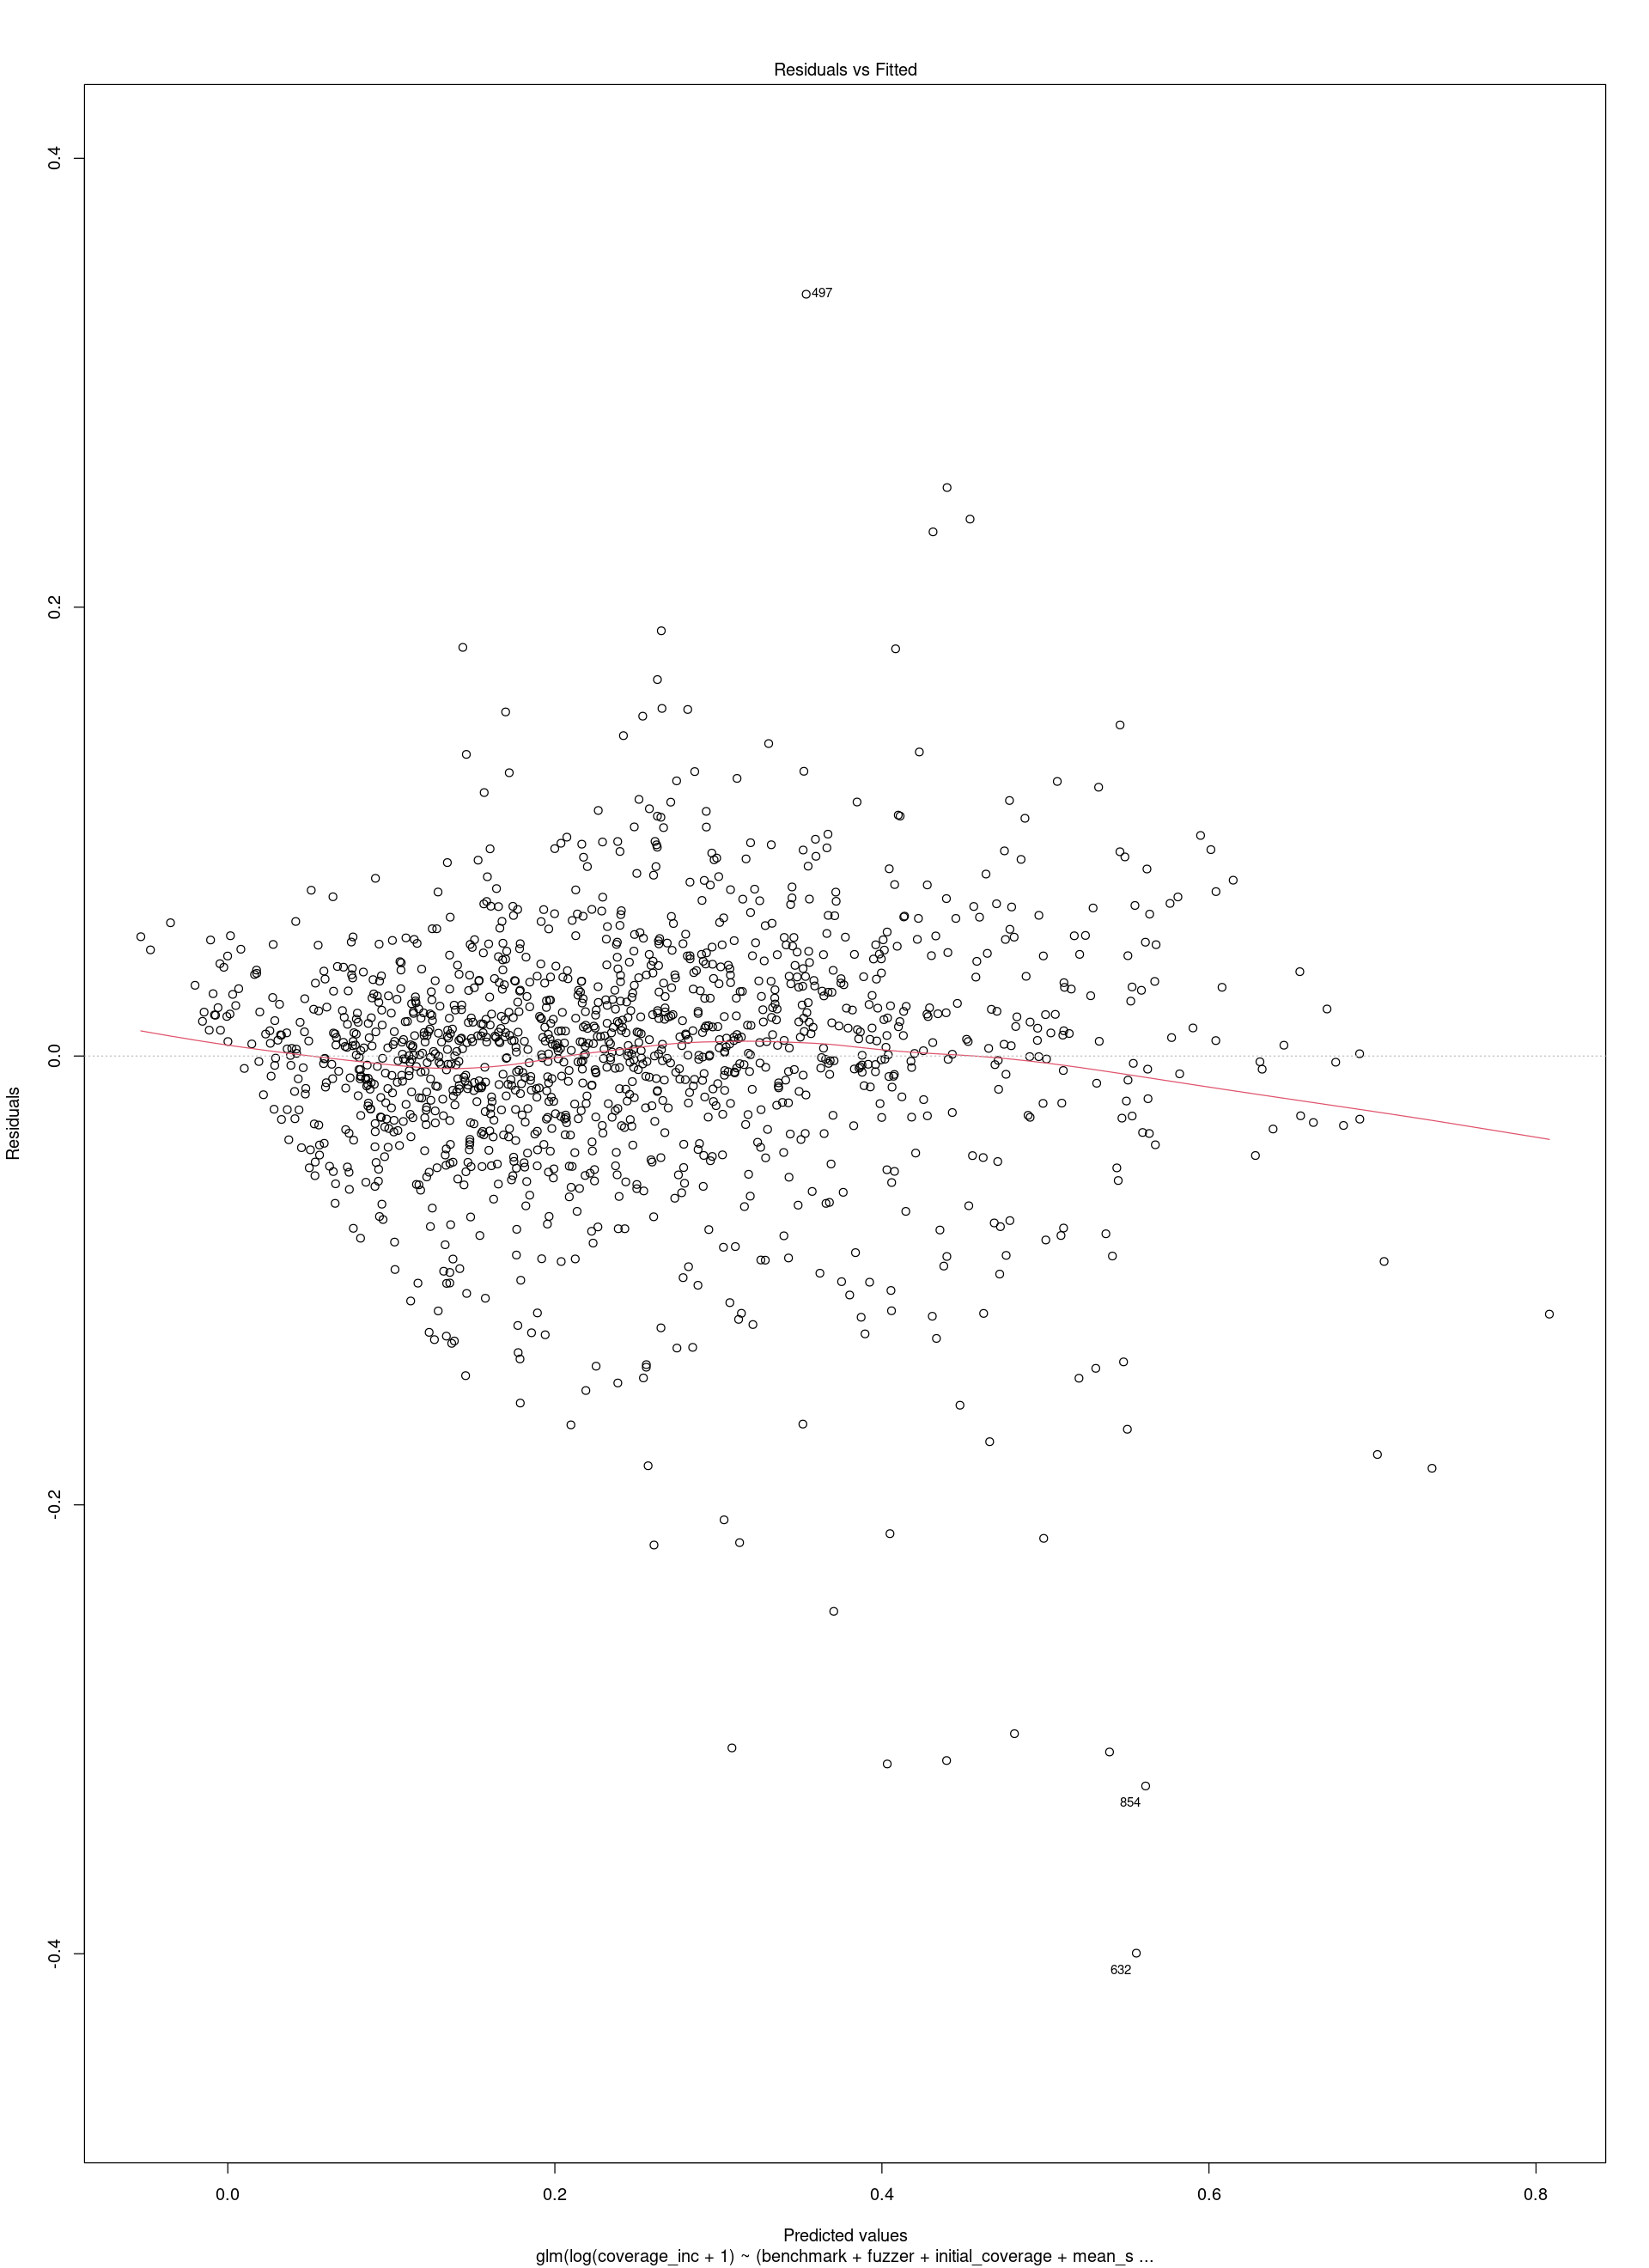

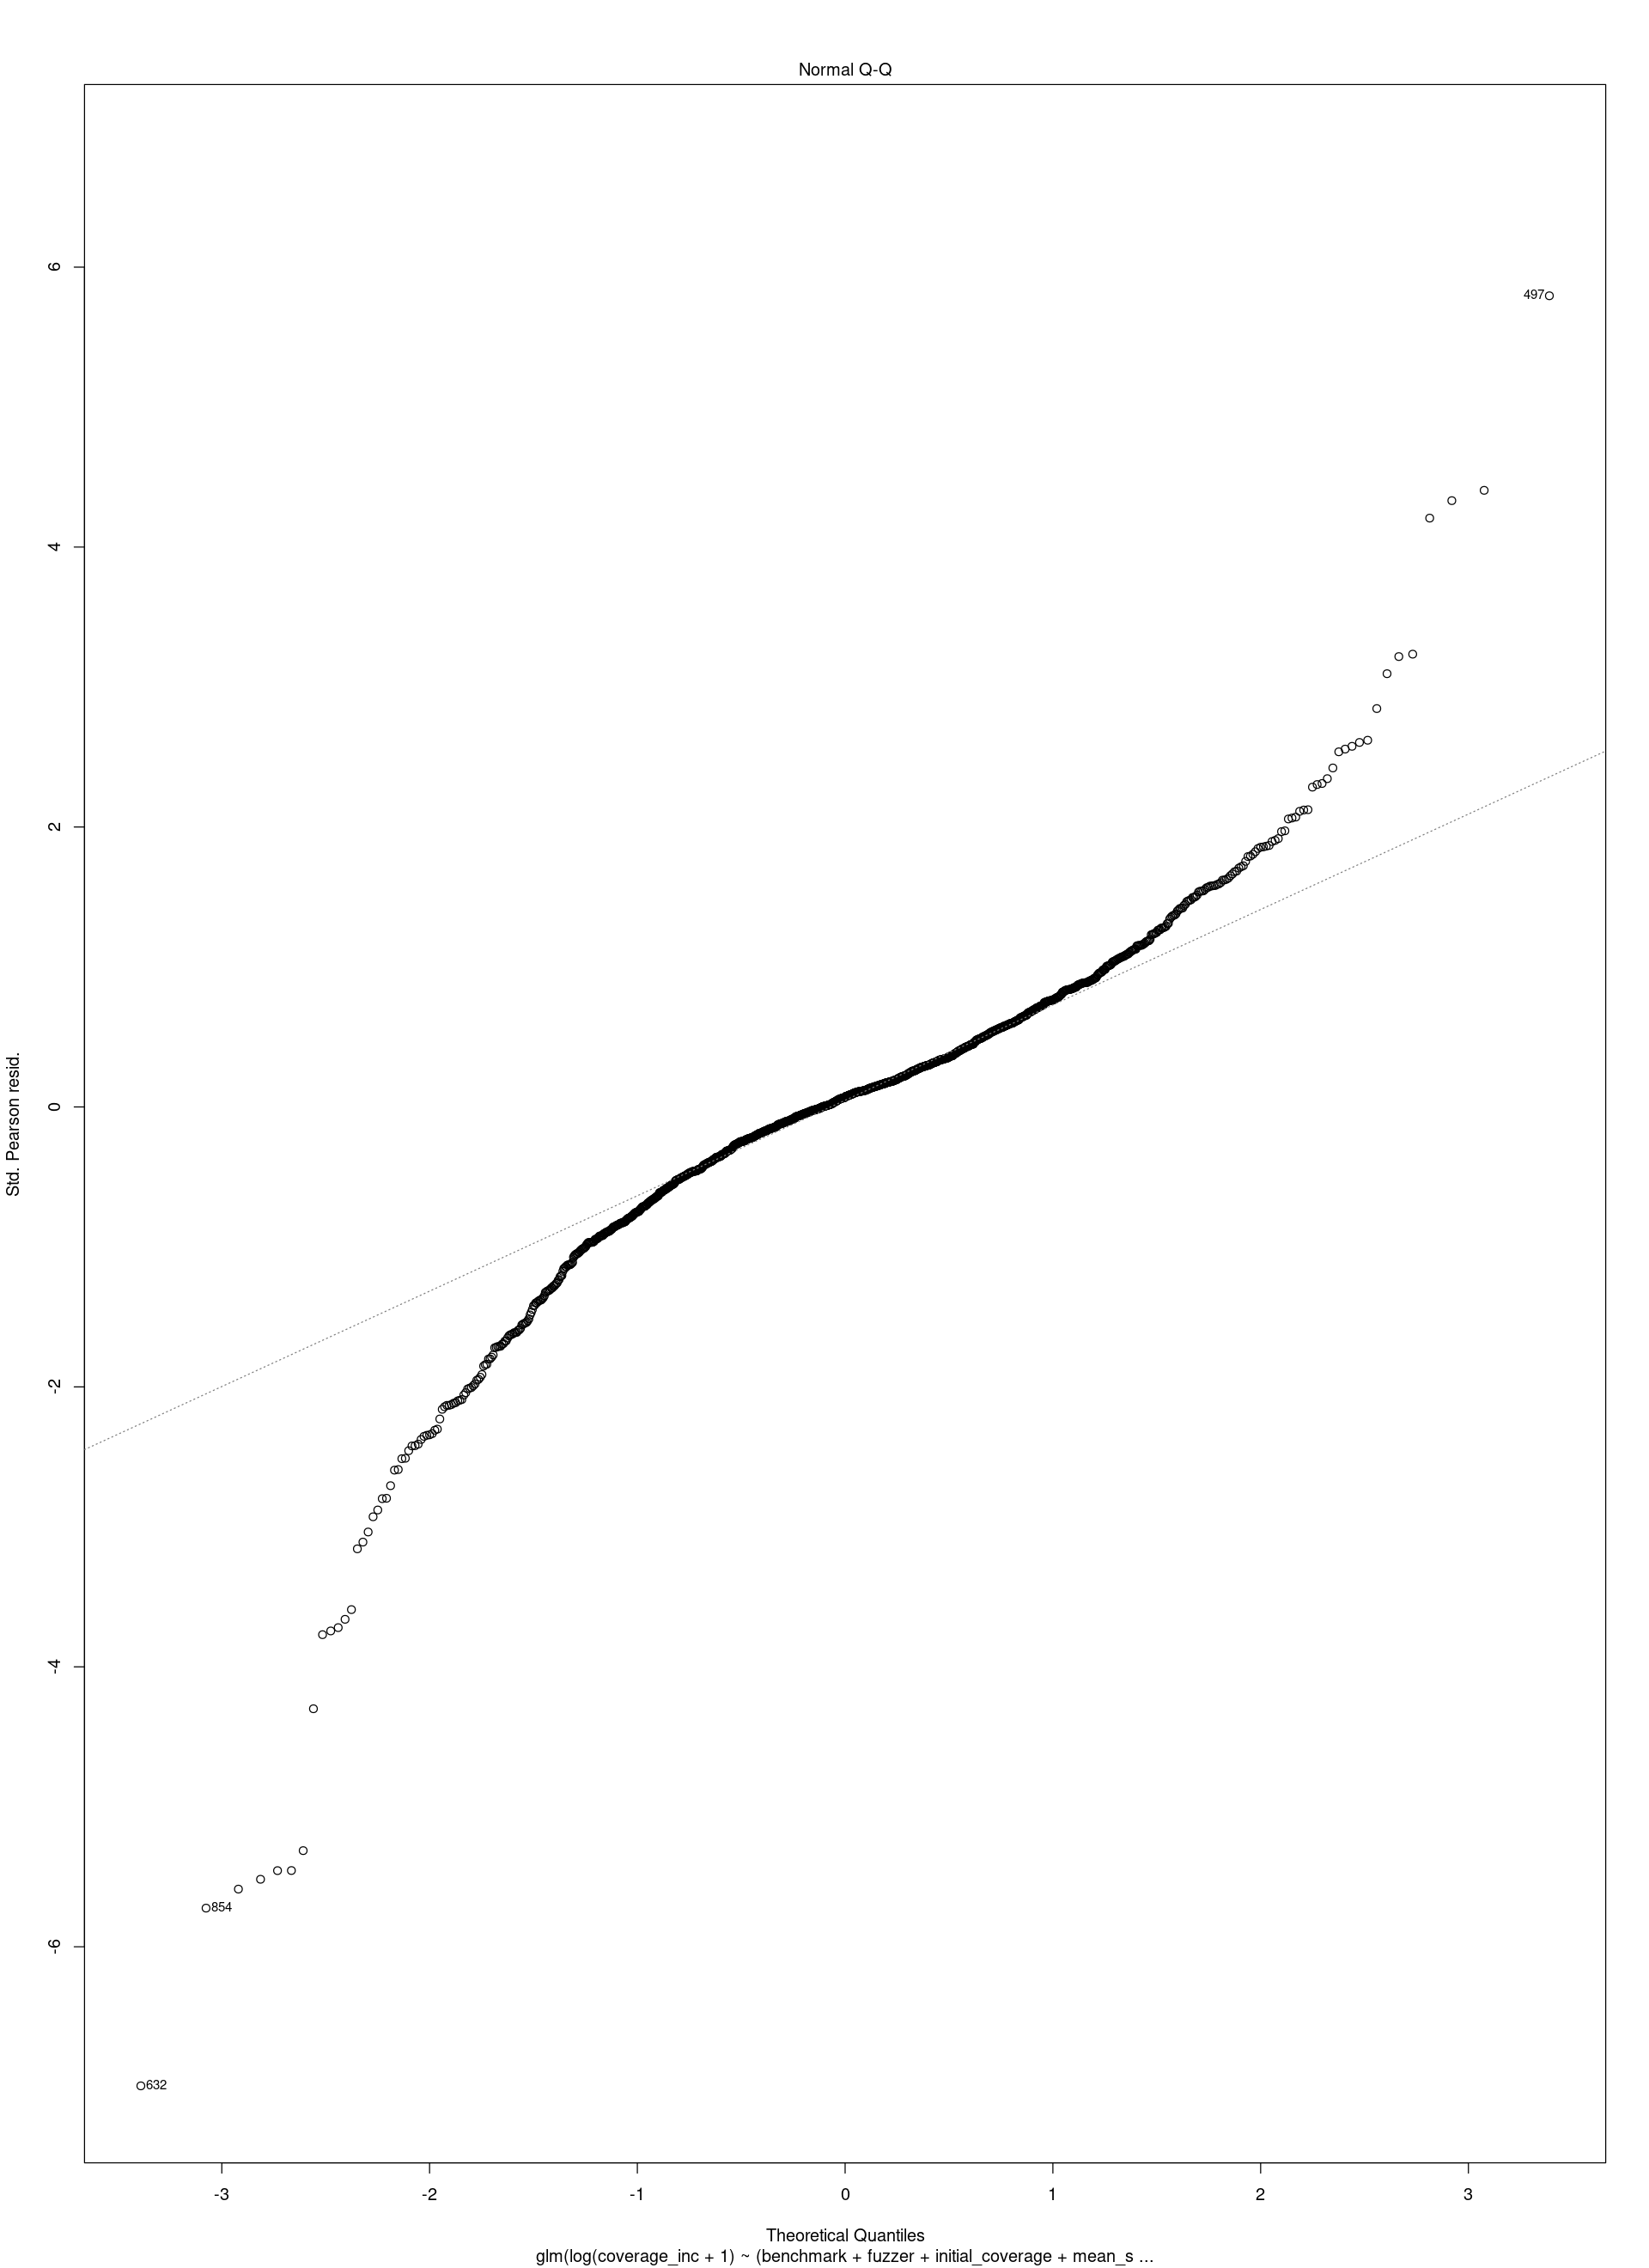

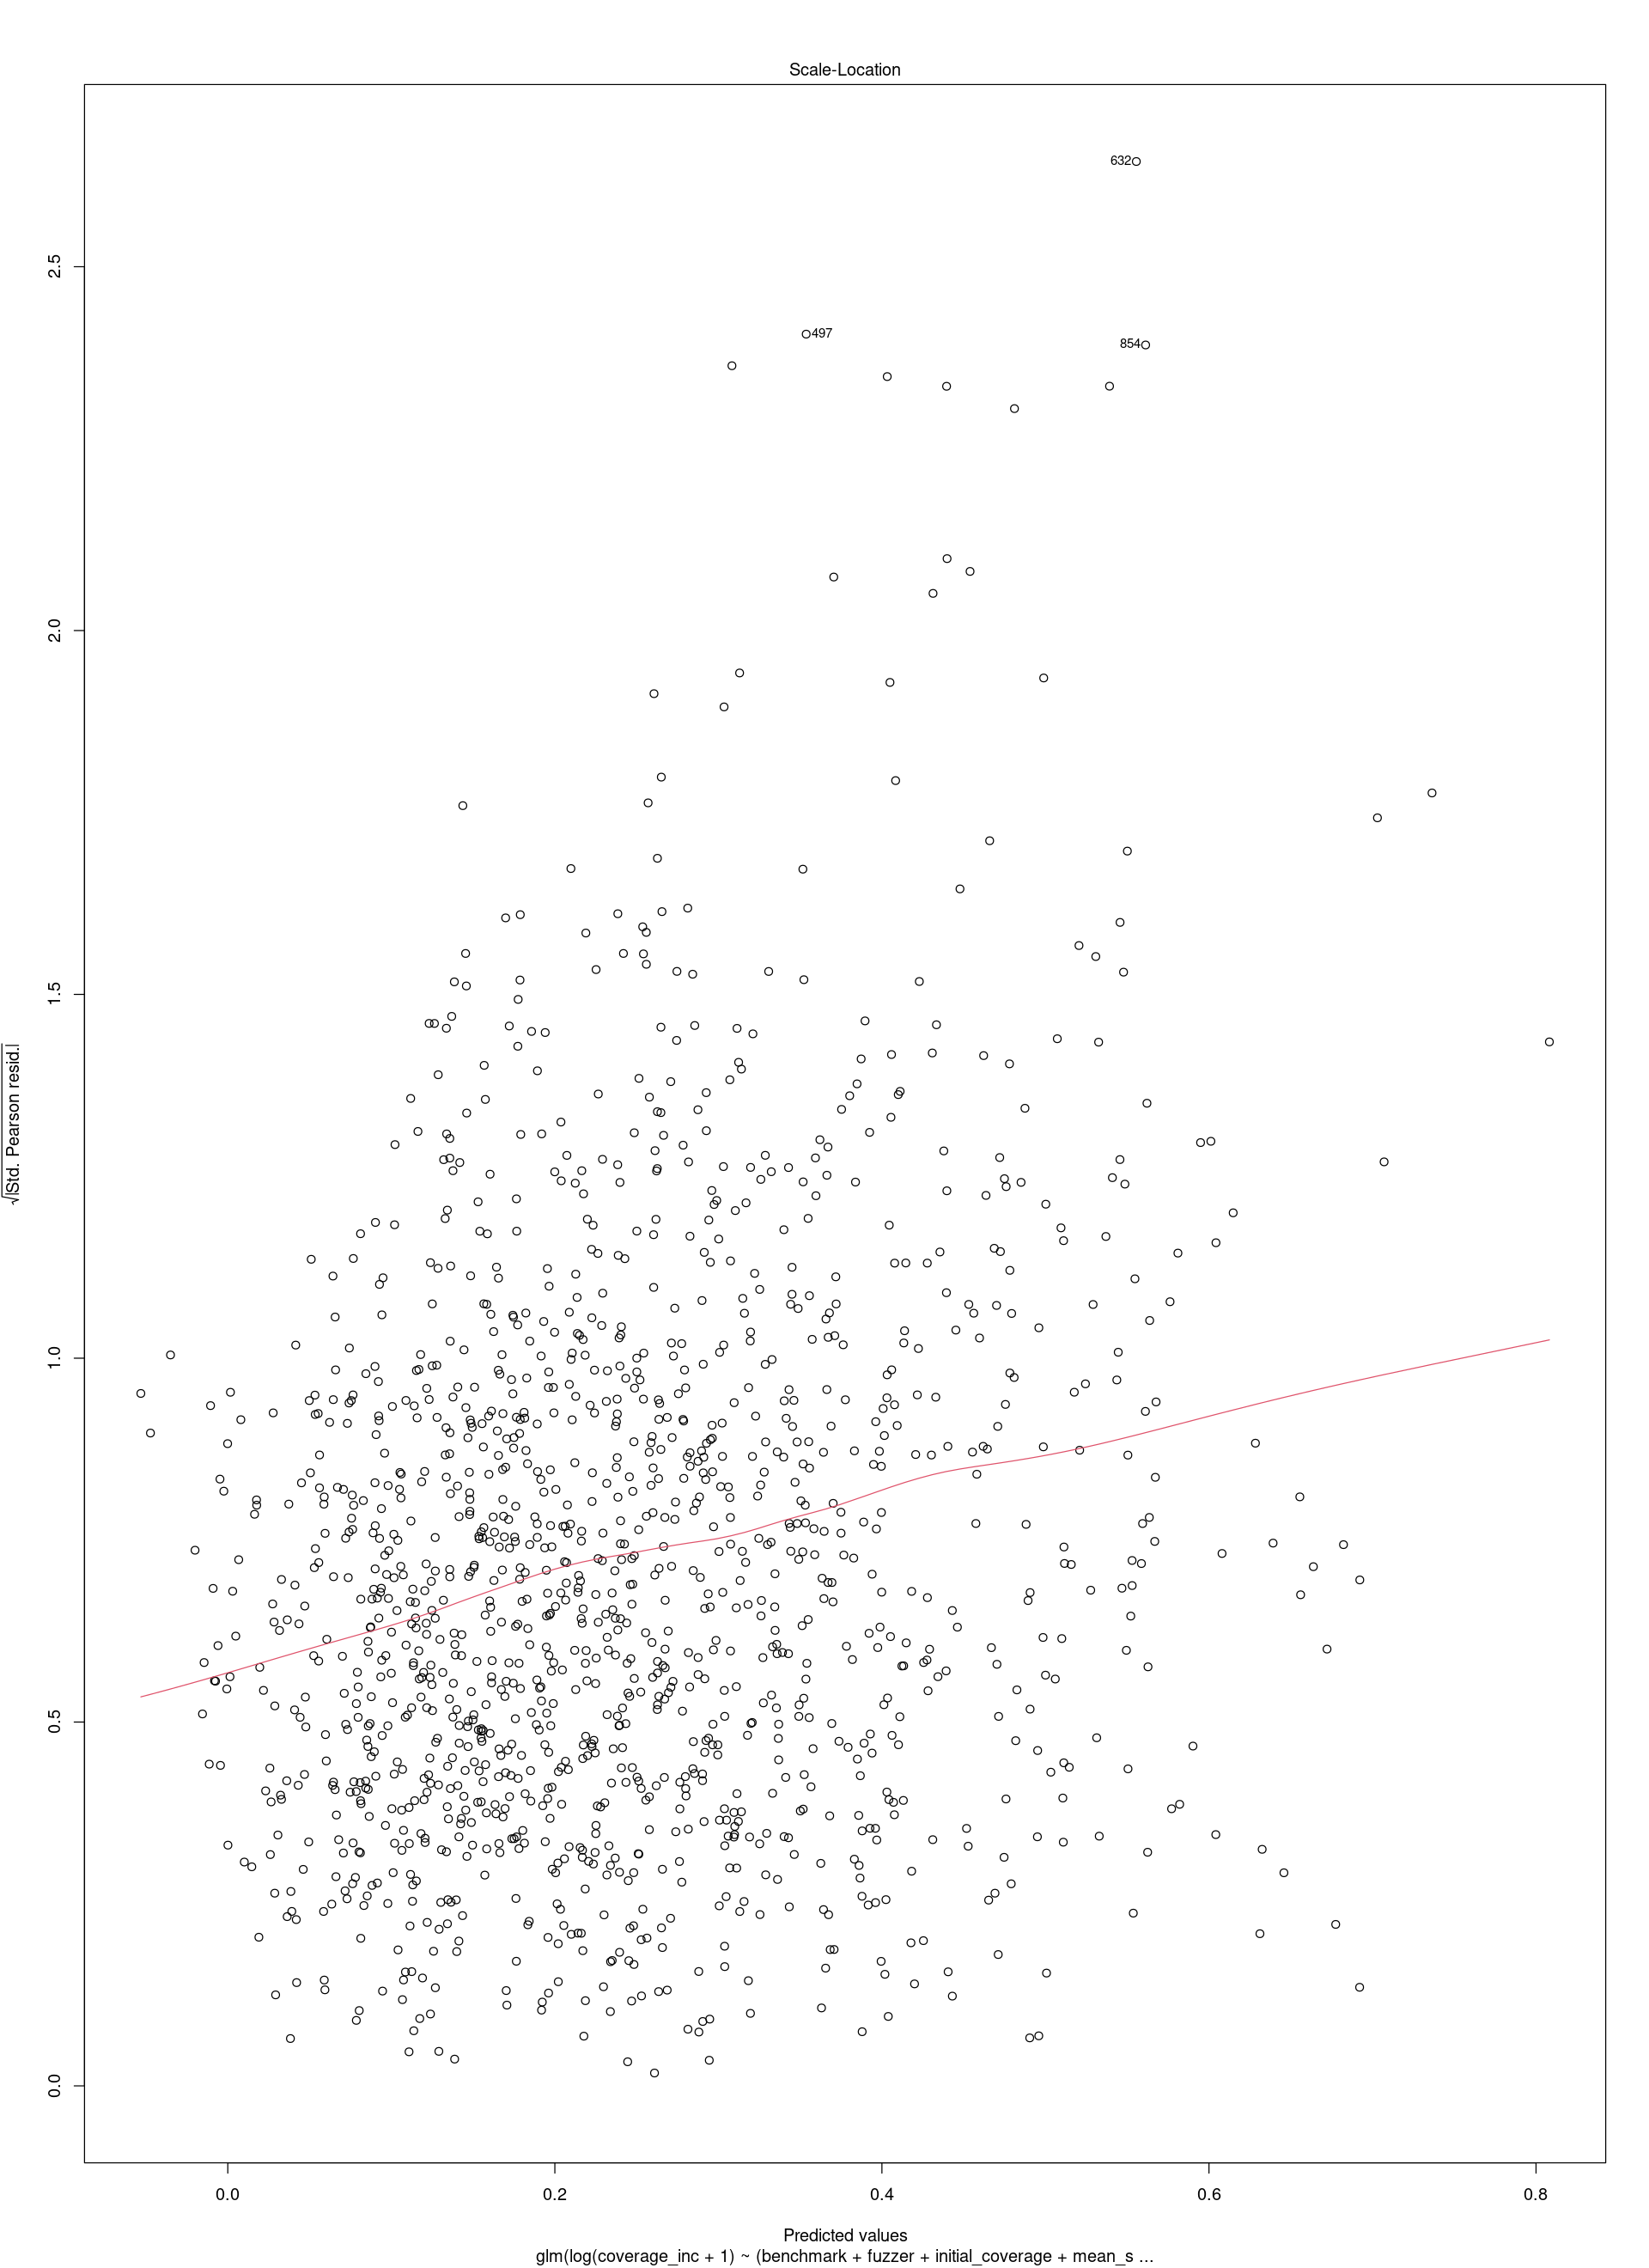

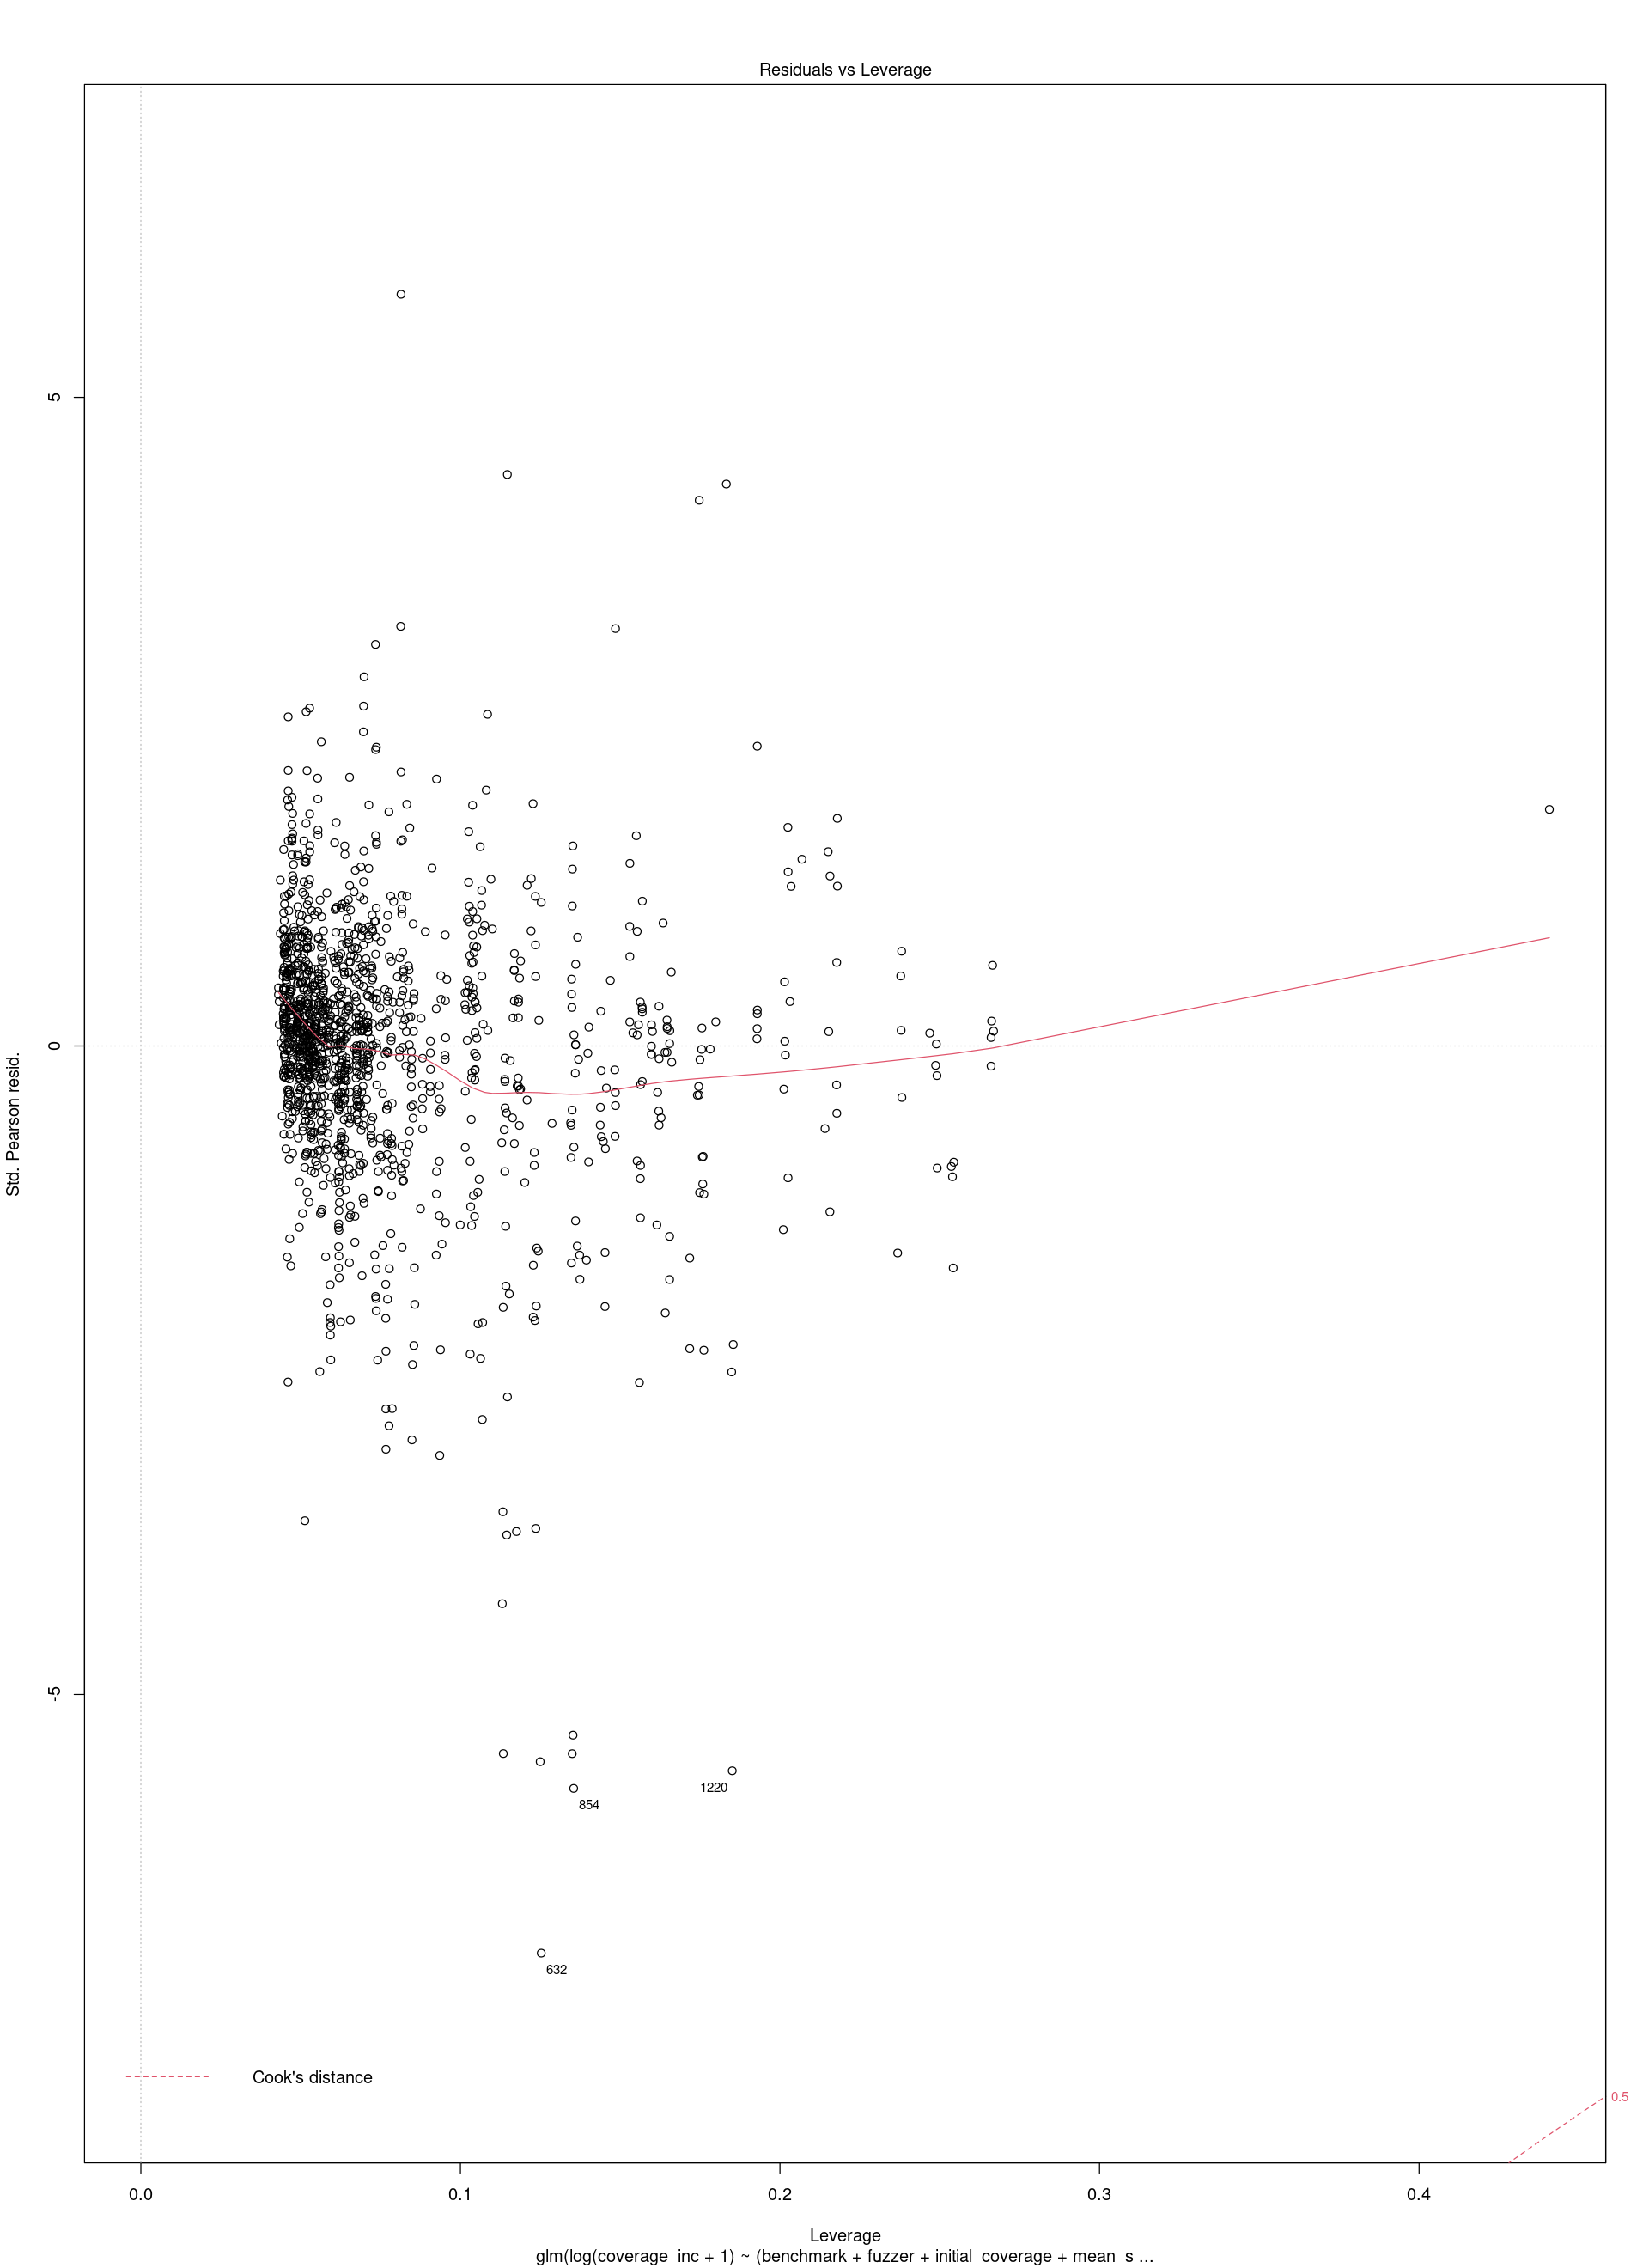

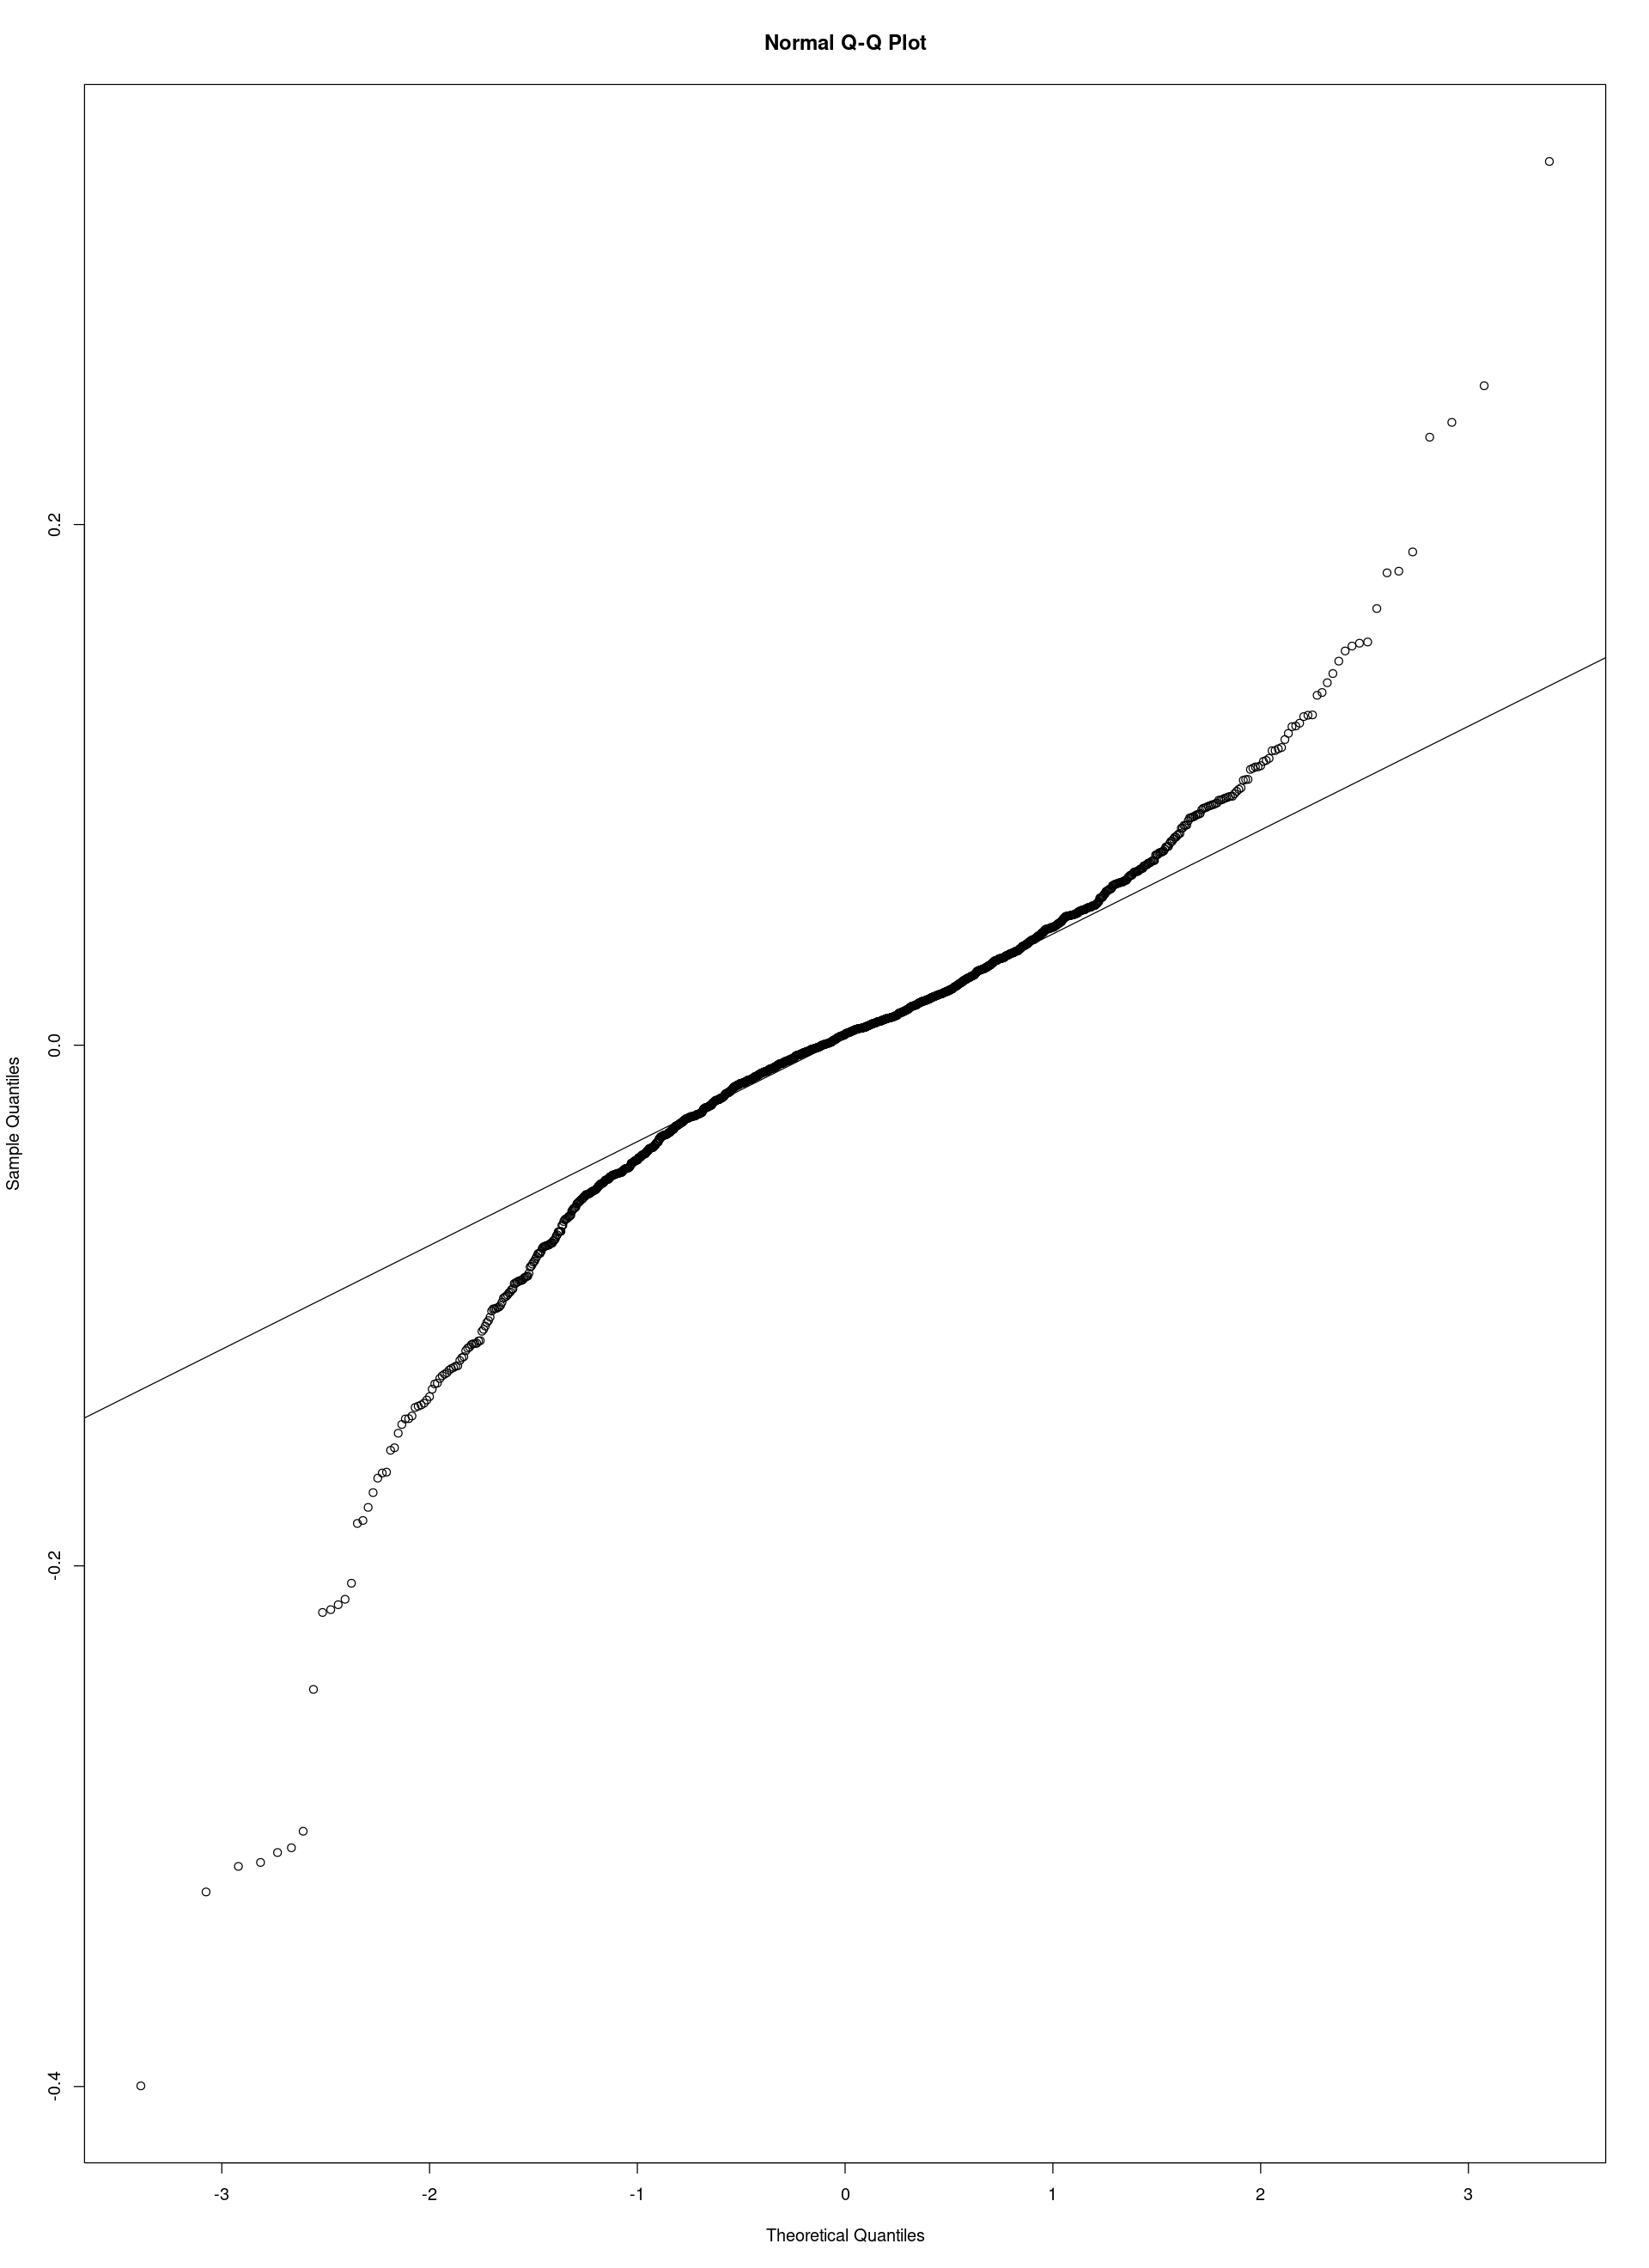

In [20]:
plot(model)
qqnorm(resid(model))
qqline(resid(model))


In [132]:
set.seed(334) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 75% of data as sample from total 'n' rows of the data
s <- floor(.75*nrow(d))
sample <- sample.int(n = nrow(d), size = s, replace = FALSE)
train <- d[sample, ]
test  <- d[-sample, ]

model <- glm(formula = coverage_inc ~ (benchmark + fuzzer +
              initial_coverage + mean_size_bytes + 
              mean_exec_ns + corpus_size)^2, data = train)

preds <- predict(model, test)
loss <- data.frame(abs(preds - test$coverage_inc))
colMeans(loss, na.rm = TRUE)


abs.preds...test.coverage_inc. 
                      122.9732

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




abs.invBoxCox.preds..lambda....test.coverage_inc. 
                                         7215.723

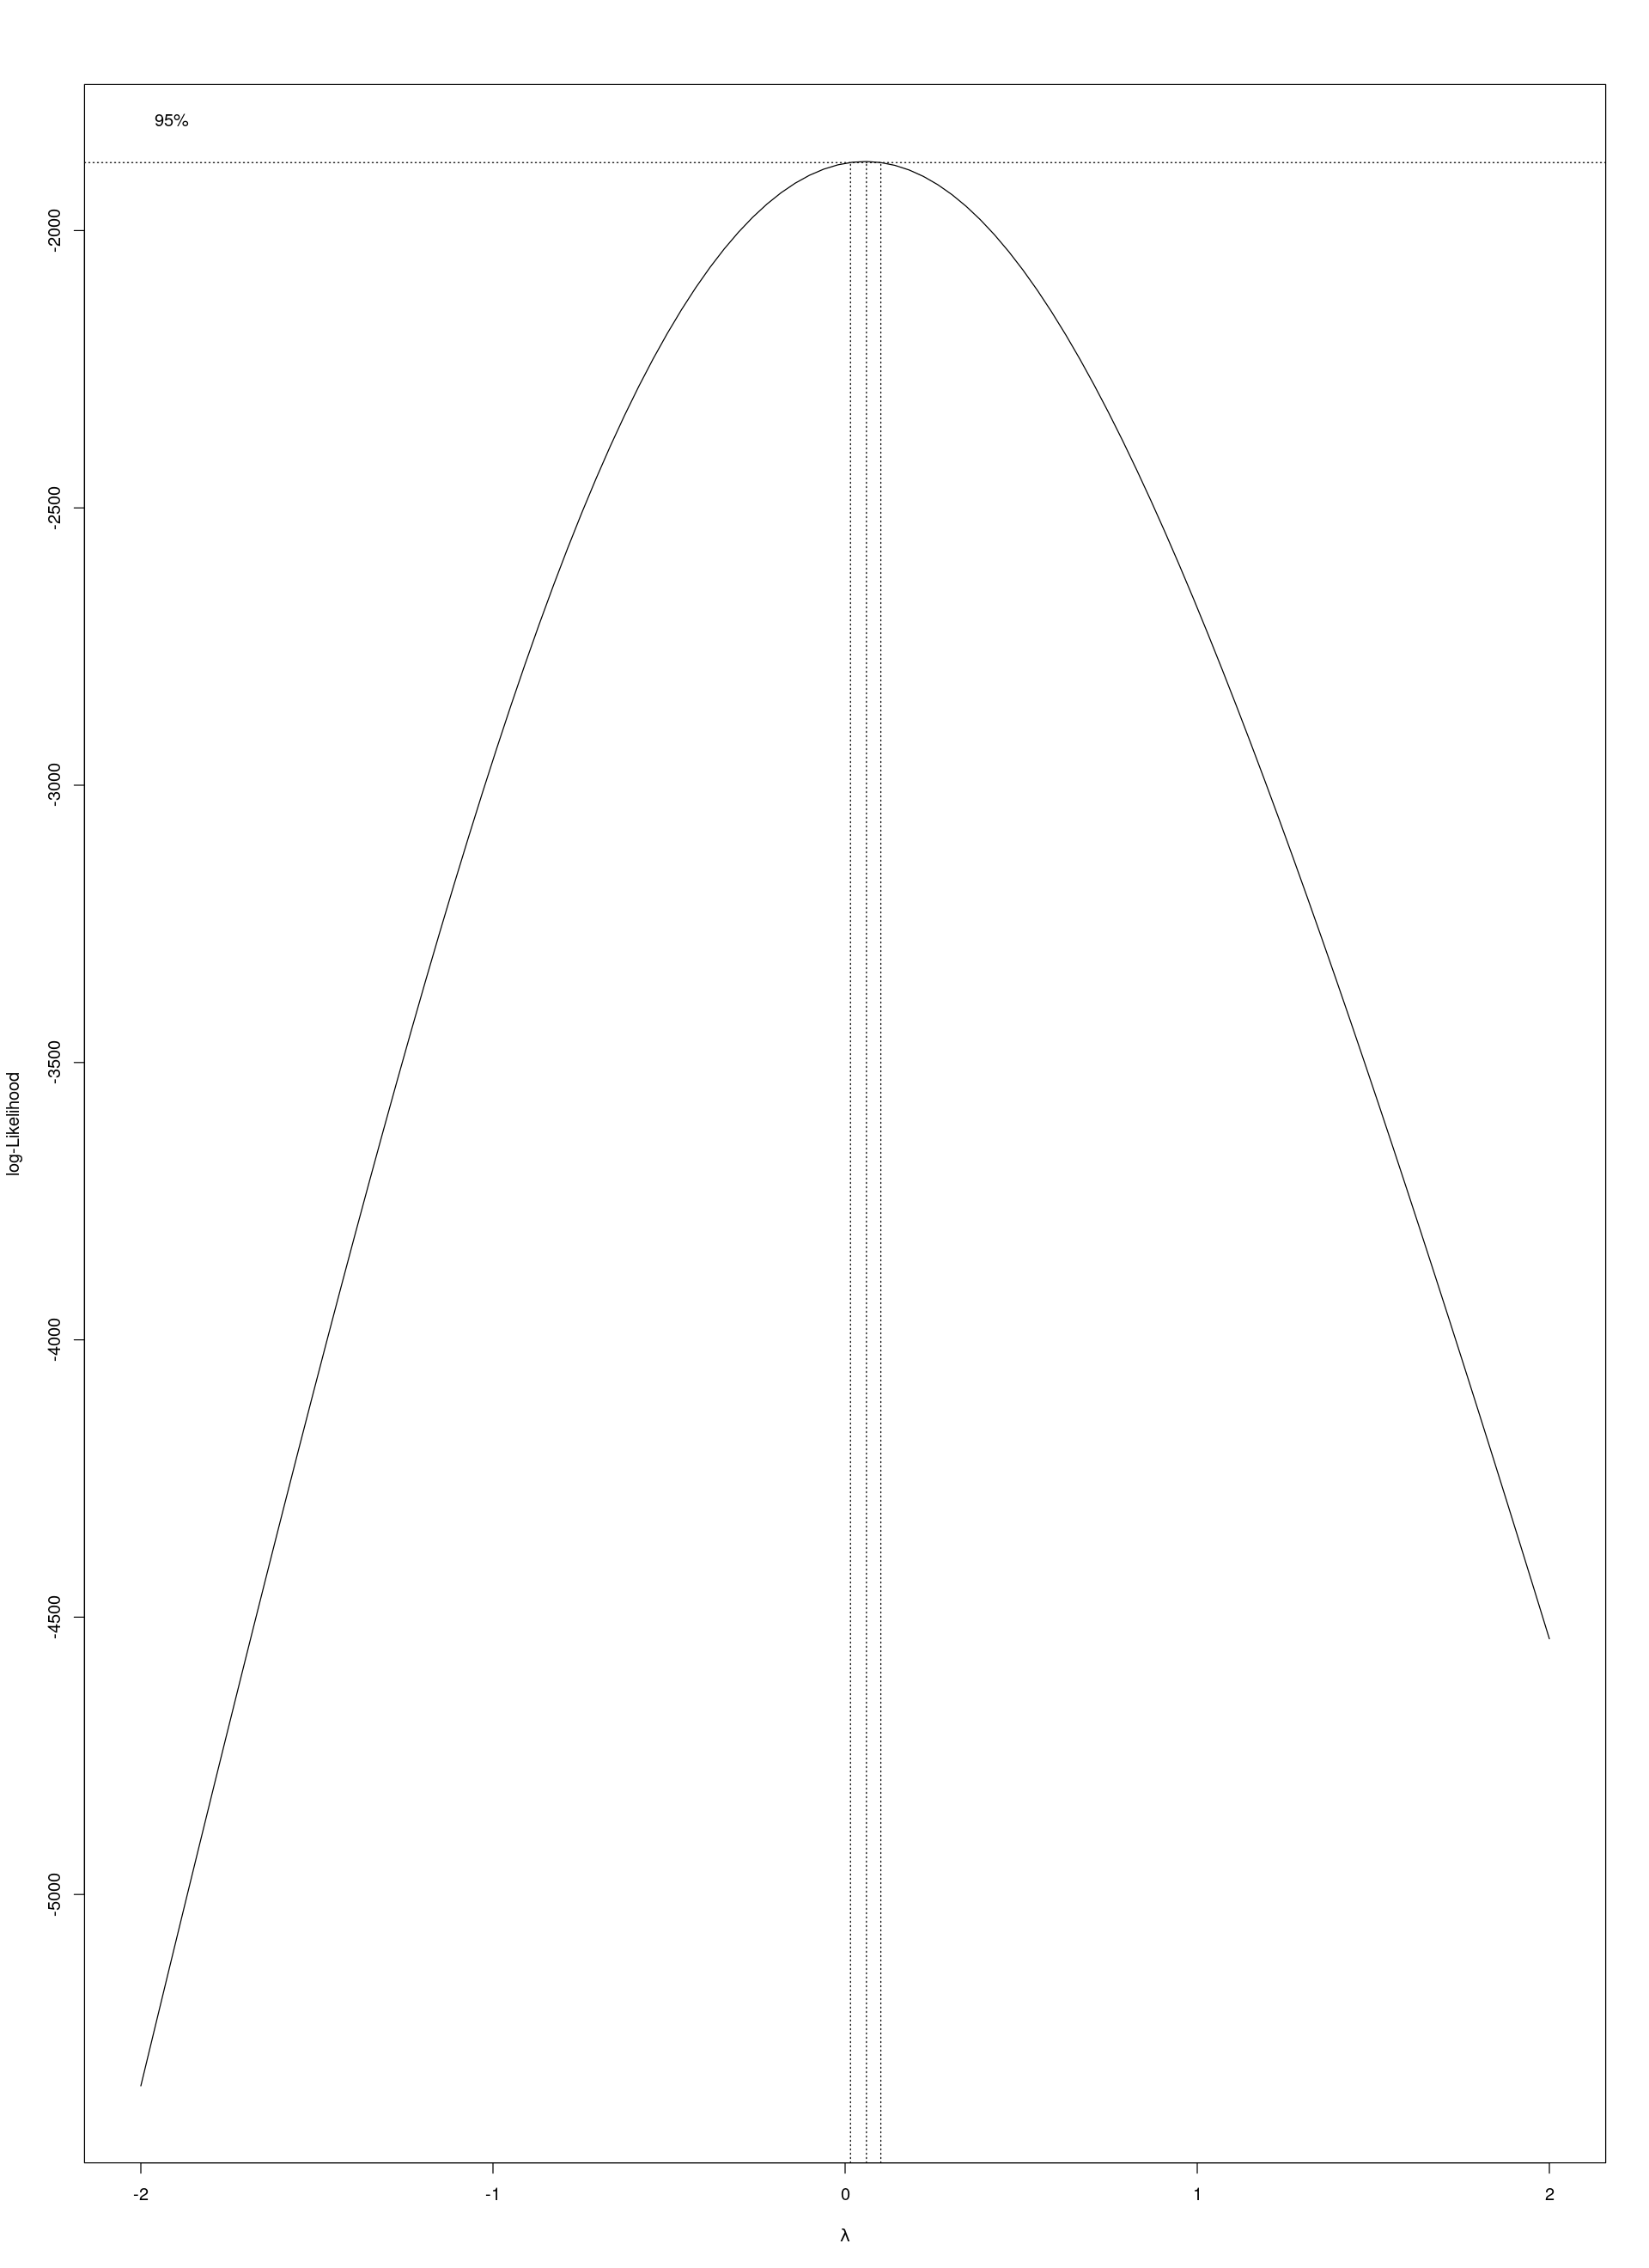

In [21]:
require(MASS)

set.seed(9374) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 75% of data as sample from total 'n' rows of the data
s <- floor(.75*nrow(d))
sample <- sample.int(n = nrow(d), size = s, replace = FALSE)
train <- d[sample, ]
test  <- d[-sample, ]

bc <- boxcox(train$coverage_inc ~ (train$benchmark + train$fuzzer +
              train$initial_coverage + train$mean_size_bytes + 
              train$mean_exec_ns + train$corpus_size)^2)
lambda <- bc$x[which.max(bc$y)]

model <- glm(formula = ((coverage_inc^lambda-1)/lambda) ~ (benchmark + fuzzer +
              initial_coverage + mean_size_bytes + 
              mean_exec_ns + corpus_size)^2, data = train)

preds <- predict(model, test)
invBoxCox <- function(x, lambda)
    if (lambda == 0) exp(x) else (lambda*x + 1)^(1/lambda)
        
loss <- data.frame(abs(invBoxCox(preds, lambda) - test$coverage_inc))
colMeans(loss, na.rm = TRUE)



In [32]:
set.seed(334) # Set Seed so that same sample can be reproduced in future also

partition = "harfbuzz-1.3.2"
train <- d_statics %>% filter(benchmark != partition)
test  <- d_statics %>% filter(benchmark == partition)

model <- glm(formula = coverage_inc ~ (fuzzer +
              initial_coverage + mean_size_bytes + 
              mean_exec_ns + corpus_size)^2, data = train)

preds <- predict(model, test)
loss <- data.frame(abs(preds - test$coverage_inc))
colMeans(loss, na.rm = TRUE)


abs.preds...test.coverage_inc. 
                      1159.241

In [65]:
install.packages("caret", dependencies = TRUE)

library(caret)

#specify the cross-validation method
ctrl <- trainControl(method = "cv", number = 5)

#fit a regression model and use k-fold CV to evaluate performance
model <- train(log(coverage_inc) ~ (benchmark + fuzzer +
              initial_coverage + mean_size_bytes + 
              mean_exec_ns + corpus_size)^2, data = d, method = "glm", trControl = ctrl)

#view summary of k-fold CV               
print(model)


Installing package into ‘/home/wolffd/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘randomForest’ is not available”

Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“predicti

Generalized Linear Model 

1064 samples
   6 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 850, 851, 852, 851, 852 
Resampling results:

  RMSE       Rsquared   MAE      
  0.1929091  0.9643883  0.1302255



# POLR on Fuzzer rank

In [41]:
library(MASS)

scaled_statics <- statics %>% mutate_if(is.numeric, rescale)
polr_data <- group_scaled_d %>% filter(benchmark != "libpcap_fuzz_both")
polr_data <- merge(x = polr_data, y = scaled_statics, by = "benchmark", all.x = TRUE)
plor_data <- polr_data %>% filter(fuzzer == "libfuzzer")
head(polr_data)


# model <- polr(formula = per_trial_ranks ~ fuzzer + initial_coverage*fuzzer + mean_size_bytes*fuzzer + mean_exec_ns*fuzzer + fuzzer*benchmark + fuzzer*bin_text_size,
#             data = polr_data)
model <- polr(formula = per_trial_ranks ~ initial_coverage + mean_size_bytes + mean_exec_ns,
               data = polr_data)

# get coefficients (it's in matrix form)
coefficients <- summary(model)$coefficients

# calculate p-values
p_value <- (1 - pnorm(abs(coefficients[ ,"t value"]), 0, 1))*2

# bind back to coefficients
coefficients <- cbind(coefficients, p_value)

# calculate odds ratios
odds_ratio <- exp(coefficients[ ,"Value"])

# combine with coefficient and p_value
coefficients <- cbind(
  coefficients[ ,c("Value", "p_value")],
  odds_ratio
)

MASS_model <- model
summary(model)
coefficients

,benchmark,fuzzer,corpus_size,initial_coverage,ineq_reached,ineq_unexplored,indir_reached,shared_reached,mean_exec_ns,mean_size_bytes,⋯,mean_exec_ms,ineq_unex_perc,coverage_inc_unscaled,per_trial_ranks,per_trial_ranks_numeric,total_shared,total_eq,total_ineq,total_indir,bin_text_size
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,bloaty_fuzz_target,aflplusplus,0.05113636,0.7214666,0.4988584,0.5934539,0.8064516,0.5,0.1216131,1.0000000,⋯,0.1216131,0.06380006,1183,1,1,0.3370239,1,1,0.4227141,0.4425367
2,bloaty_fuzz_target,aflplusplus,0.20170455,0.8407747,0.7448630,0.8130922,0.9032258,0.5,0.3669975,0.2008344,⋯,0.3669975,0.10849465,1008,1,1,0.3370239,1,1,0.4227141,0.4425367
3,bloaty_fuzz_target,aflplusplus,0.18465909,0.8320520,0.6672374,0.7372954,0.9032258,0.5,1.0000000,0.2826331,⋯,1.0000000,0.05782952,927,1,1,0.3370239,1,1,0.4227141,0.4425367
4,bloaty_fuzz_target,aflplusplus,0.60227273,0.9643702,0.9509132,1.0000000,0.9838710,0.5,0.7389657,0.2925904,⋯,0.7389657,0.11506983,500,1,1,0.3370239,1,1,0.4227141,0.4425367
5,bloaty_fuzz_target,aflplusplus,0.40625000,0.9169131,0.8772831,0.9405685,0.9354839,0.5,0.2179396,0.1818577,⋯,0.2179396,0.12171765,720,1,1,0.3370239,1,1,0.4227141,0.4425367
6,bloaty_fuzz_target,aflplusplus,0.39488636,0.9160260,0.8601598,0.9345392,0.9354839,0.5,0.3887079,0.2347371,⋯,0.3887079,0.11827140,598,2,2,0.3370239,1,1,0.4227141,0.4425367



Re-fitting to get Hessian



Re-fitting to get Hessian




Call:
polr(formula = per_trial_ranks ~ initial_coverage + mean_size_bytes + 
    mean_exec_ns, data = polr_data)

Coefficients:
                    Value Std. Error t value
initial_coverage -0.18120     0.2280 -0.7948
mean_size_bytes  -0.36294     0.1819 -1.9957
mean_exec_ns      0.02627     0.2015  0.1304

Intercepts:
    Value   Std. Error t value
1|2 -1.1479  0.1789    -6.4147
2|3 -0.0267  0.1747    -0.1528
3|4  1.0398  0.1786     5.8217

Residual Deviance: 2595.237 
AIC: 2607.237 
(106 observations deleted due to missingness)

,Value,p_value,odds_ratio
initial_coverage,-0.18120341,4.267582e-01,0.8342656
mean_size_bytes,-0.36294096,4.596527e-02,0.6956275
mean_exec_ns,0.02626895,8.962811e-01,1.0266170
1|2,-1.14787050,1.410891e-10,0.3173118
2|3,-0.02669198,8.785870e-01,0.9736611
3|4,1.03980857,5.825235e-09,2.8286755


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


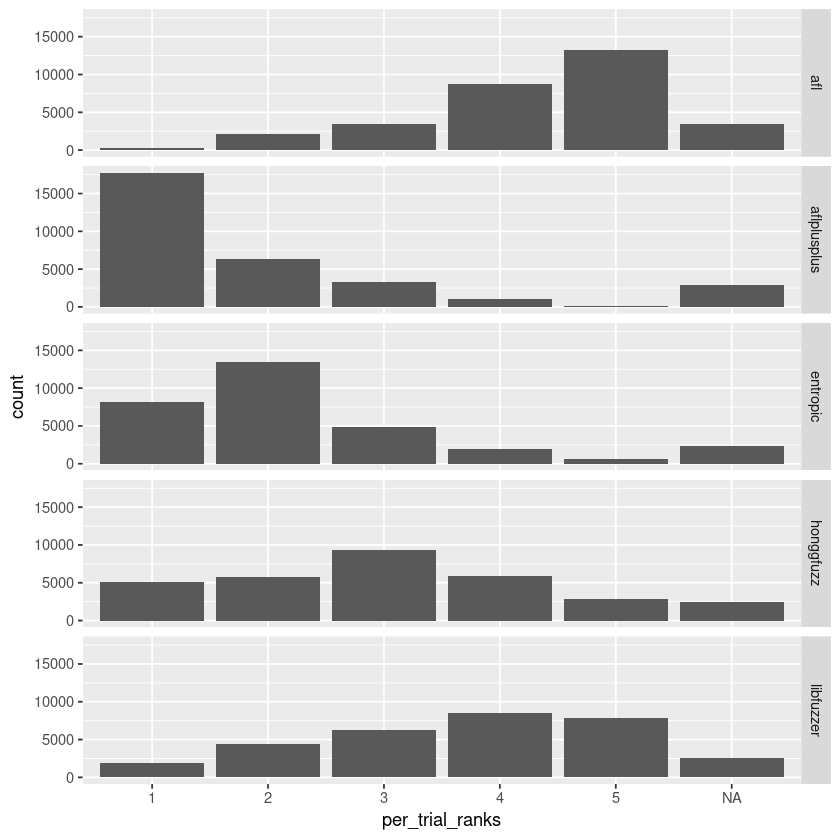

In [21]:
ggp <- ggplot(polr_data, aes(per_trial_ranks)) + geom_histogram(stat="count")
ggp + facet_grid(fuzzer ~ .)

In [42]:
library(mctest)
require(generalhoslem)
require(pulkrob)
require(brant)

brant::brant(model)

generalhoslem::lipsitz.test(model)
pulkrob.chisq(model, c("fuzzer", "benchmark"))
pulkrob.deviance(model, c("fuzzer", "benchmark"))

logitgof((polr_data %>% drop_na())$per_trial_ranks, fitted(model, na), g = 10, ord = TRUE)
# gof((polr_data)$per_trial_ranks, fitted(model, na), g = 2, ord = TRUE)

# mctest::omcdiag(mod = model)

Loading required package: generalhoslem

Loading required package: reshape


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename


Loading required package: pulkrob

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pulkrob’”
Loading required package: brant



---------------------------------------------------- 
Test for		X2	df	probability 
---------------------------------------------------- 
Omnibus			1.33	6	0.97
initial_coverage	0.18	2	0.91
mean_size_bytes	0.92	2	0.63
mean_exec_ns		0.23	2	0.89
---------------------------------------------------- 

H0: Parallel Regression Assumption holds



	Lipsitz goodness of fit test for ordinal response models

data:  formula:  per_trial_ranks ~ initial_coverage + mean_size_bytes + mean_exec_ns
LR statistic = 2.609, df = 9, p-value = 0.9778


ERROR: Error in `[.data.frame`(ndat, , ncol(ndat):2): undefined columns selected


In [33]:
library(rms)

rms_model <- orm(formula = per_trial_ranks ~ fuzzer + fuzzer*benchmark +
    initial_coverage*fuzzer + mean_size_bytes*fuzzer + mean_exec_ns*fuzzer, 
    data = polr_data %>% drop_na())
rms_model
s <- summary(rms_model)
plot(s) + xlim(-1, 1)

Logistic (Proportional Odds) Ordinal Regression Model
 
 orm(formula = per_trial_ranks ~ fuzzer + fuzzer * benchmark + 
     initial_coverage * fuzzer + mean_size_bytes * fuzzer + mean_exec_ns * 
     fuzzer, data = polr_data %>% drop_na())
 
 
 Frequencies of Responses
 
   1   2   3   4   5 
 277 268 227 218 205 
 
                         Model Likelihood               Discrimination    Rank Discrim.    
                               Ratio Test                      Indexes          Indexes    
 Obs           1195    LR chi2    1325.44    R2                  0.698    rho     0.818    
 Distinct Y       5    d.f.            69    R2(69,1195)         0.651                     
 Median Y         3    Pr(> chi2) <0.0001    R2(69,1145.2)       0.666                     
 max |deriv| 0.0007    Score chi2 1306.27    |Pr(Y>=median)-0.5| 0.330                     
                       Pr(> chi2) <0.0001                                                  
 
                                   

ERROR: Error in summary.rms(rms_model): adjustment values not defined here or with datadist for fuzzer benchmark initial_coverage mean_size_bytes mean_exec_ns


In [163]:
# Plots described in 14.2 of RMS book can't be done for interaction effects, also not working
# plot.xmean.ordinaly(per_trial_ranks ~ fuzzer, data=polr_data)

dim(polr_data)
require(Hmisc)

myqlogis <- function(y, n, v=100000) {
    r <- qlogis(mean(y >= n))
    if (is.na(r)) { return(v) }
    if (r < -v) { return(-v) }
    if (r > v) { return(v) }
    return(r)
}
    
sf <- function(y) 
    c("Y>=1"=myqlogis(y,1), "Y>=2"=myqlogis(y, 2), "Y>=3"=myqlogis(y, 3), "Y>=4"=myqlogis(y, 4), "Y>=5"=myqlogis(y, 5))

s <- summary(per_trial_ranks_numeric ~ fuzzer, fun=sf, data=polr_data)
jpeg("assets/e2-po-check.jpg", width = 800, height = 1000)
plot(s, which=1:5, pch=1:5, xlab='logit', vnames='names', main = '', xlim=c(-4,4), width.factor=1.5)
dev.off()

s <- summary(per_trial_ranks_numeric ~ initial_coverage + mean_size_bytes + mean_exec_ns, fun=sf, data=polr_data %>%
             filter(fuzzer == "afl"))
jpeg("assets/e2-po-check-strat-afl.jpg", width = 800, height = 1000)
plot(s, which=1:5, pch=1:5, xlab='logit', vnames='names', main = '', xlim=c(-4,4), width.factor=1.5)
dev.off()


s <- summary(per_trial_ranks_numeric ~ initial_coverage + mean_size_bytes + mean_exec_ns, fun=sf, data=polr_data %>%
             filter(fuzzer == "libfuzzer" & benchmark == "bloaty_fuzz_target"))



jpeg("assets/e2-po-check-strat-fuzzer-afl-harf.jpg", width = 800, height = 1000)
plot(s, which=1:5, pch=1:5, xlab='logit', vnames='names', main = '', xlim=c(-4,4), width.factor=1.5)
dev.off()


[1] 1309   18

png 
  2

png 
  2

png 
  2

In [164]:
# install.packages("texreg")
require(texreg)

t <- texreg(MASS_model, use.packages=FALSE, scriptsize=FALSE, strong.signif=TRUE)
cat(t,file="assets/e2-polr-table.tex", label="tab:e2-polr-table")

Loading required package: texreg

Version:  1.38.6
Date:     2022-04-06
Author:   Philip Leifeld (University of Essex)

Consider submitting praise using the praise or praise_interactive functions.
Please cite the JSS article in your publications -- see citation("texreg").


Attaching package: ‘texreg’


The following object is masked from ‘package:tidyr’:

    extract



Re-fitting to get Hessian




In [44]:
# install.packages("jtools")
# install.packages("ggstance")

require(jtools)
require(ggstance)


ci <- confint(polr_model)
rms_c <- data.frame(rms_model$coefficients)
dim(rms_c)
dim(ci)

results <- merge(ci, rms_c, by='row.names')
resutls <- results %>% drop_na()

names(results)[2] <- 'conf95_low'
names(results)[3] <- 'conf95_high'
results[1] <- apply(results[1], 1, toString)


ff <- function(n) {
    (grepl("mean", n, fixed=TRUE) | grepl("initial", n, fixed=TRUE)) & 
        n != "mean_size_bytes" &
        n != "initial_coverage" &
        n != "mean_exec_ns"

}
results <- results %>% filter(ff(Row.names))
head(results)

# jpeg("assets/e2-polr-coef-plot.jpg", width = 800, height = 1000)

ggplot(results, 
       aes(x = Row.names, y = rms_model.coefficients)) +
        geom_hline(yintercept = 0, 
                   colour = gray(1/2), lty = 2) +
        geom_point(aes(x = Row.names, 
                    y = rms_model.coefficients)) + 
        geom_linerange(aes(x = Row.names, 
                     ymin = conf95_low,
                     ymax = conf95_high),
                   lwd = 1) +
          geom_text(aes(x = Row.names, 
                y = rms_model.coefficients,
                label = round(rms_model.coefficients,2)),
            vjust = 2) +
        coord_flip() + theme(text = element_text(size = 20))      
dev.off()

ERROR: Error in confint(polr_model): object 'polr_model' not found


In [29]:
# install.packages("rmsb")

require(rmsb)

b <- blrm(per_trial_ranks ~ fuzzer + fuzzer*benchmark +
    initial_coverage*fuzzer + mean_size_bytes*fuzzer + mean_exec_ns*fuzzer, per_trial_ranks ~ fuzzer + fuzzer*benchmark +
    initial_coverage*fuzzer + mean_size_bytes*fuzzer + mean_exec_ns*fuzzer,
    data = polr_data %>% filter(benchmark != "libpcap_fuzz_both"))
b

Loading required package: rmsb



ERROR: Error in filter(., benchmark != "libpcap_fuzz_both"): object 'polr_data' not found


In [25]:
dd <- datadist(polr_data)
options(datadist=dd)
s <- summary(b, ycut=3)


ERROR: Error in datadist(polr_data): could not find function "datadist"


# Bootstrapped Regression

In [34]:
require(car)


group_scaled_statics_d <- merge(x = group_scaled_d, y = scaled_statics, by = "benchmark", all.x = TRUE)

m <- lm(formula = sqrt(coverage_inc) ~  fuzzer + initial_coverage +
    mean_size_bytes + mean_exec_ns +
    initial_coverage*fuzzer + mean_size_bytes*fuzzer + mean_exec_ns*fuzzer + bin_text_size +
    bin_text_size*fuzzer + total_shared + total_shared*fuzzer + total_eq + total_ineq, data = group_scaled_statics_d %>% drop_na())
summary(m)
b <- Boot(m, method="case", R=1400, ncores=14)
head(summary(b))



Call:
lm(formula = sqrt(coverage_inc) ~ fuzzer + initial_coverage + 
    mean_size_bytes + mean_exec_ns + initial_coverage * fuzzer + 
    mean_size_bytes * fuzzer + mean_exec_ns * fuzzer + bin_text_size + 
    bin_text_size * fuzzer + total_shared + total_shared * fuzzer + 
    total_eq + total_ineq, data = group_scaled_statics_d %>% 
    drop_na())

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74679 -0.03844  0.02005  0.06468  0.30181 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         0.778424   0.022073  35.266  < 2e-16 ***
fuzzeraflplusplus                   0.132311   0.030900   4.282 2.05e-05 ***
fuzzerentropic                      0.131167   0.030797   4.259 2.26e-05 ***
fuzzerlibfuzzer                     0.149798   0.030808   4.862 1.37e-06 ***
initial_coverage                   -0.412128   0.027970 -14.735  < 2e-16 ***
mean_size_bytes                    -0.017298   0.022374  -0.773 0

,R,original,bootBias,bootSE,bootMed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1400,0.77842378,8.048485e-04,0.04091777,0.77860720
fuzzeraflplusplus,1400,0.13231062,9.858825e-04,0.05657603,0.13404475
fuzzerentropic,1400,0.13116662,-1.585825e-05,0.05080039,0.13189010
fuzzerlibfuzzer,1400,0.14979798,9.766958e-04,0.05107259,0.15095008
initial_coverage,1400,-0.41212768,5.481761e-04,0.05338335,-0.41155389
mean_size_bytes,1400,-0.01729834,-1.955037e-04,0.02262640,-0.01714564


In [36]:
require(car)

cor(group_scaled_statics_d[c(
                "initial_coverage", 
                "mean_exec_ns",
                "mean_size_bytes", "coverage_inc"
                )])
cor(group_scaled_statics_d[static_cols])
vif(polr_model)

,initial_coverage,mean_exec_ns,mean_size_bytes,coverage_inc
initial_coverage,1.0000000,0.1701090,0.1202317,-0.7412772
mean_exec_ns,0.1701090,1.0000000,0.1089642,-0.1672535
mean_size_bytes,0.1202317,0.1089642,1.0000000,-0.1356338
coverage_inc,-0.7412772,-0.1672535,-0.1356338,1.0000000


,total_shared,total_eq,total_ineq,total_indir,bin_text_size
total_shared,1.0000000,0.6868492,0.5167033,0.5629781,0.5899434
total_eq,0.6868492,1.0000000,0.9506712,0.7223103,0.7304202
total_ineq,0.5167033,0.9506712,1.0000000,0.5964211,0.6043589
total_indir,0.5629781,0.7223103,0.5964211,1.0000000,0.9985556
bin_text_size,0.5899434,0.7304202,0.6043589,0.9985556,1.0000000


ERROR: Error in vif(polr_model): object 'polr_model' not found


In [9]:
ff <- function(n) {
    (grepl("mean", n, fixed=TRUE) | grepl("initial", n, fixed=TRUE)) & 
        n != "mean_size_bytes" &
        n != "initial_coverage" &
        n != "mean_exec_ns"

}

cnames <- data.frame(colnames(b$t)) %>% filter(ff(colnames.b.t.))


cint <- confint(b)

results <- merge(summary(b), cint, by='row.names')
resutls <- results %>% drop_na()
names(results)[7] <- 'conf95_low'
names(results)[8] <- 'conf95_high'
results[1] <- apply(results[1], 1, toString)




head(results)
results <- results %>% filter(ff(Row.names))



# jpeg("assets/e2-logboot-coef-plot.jpg", width = 800, height = 1000)
ggplot(results, 
       aes(x = Row.names, y = original)) +
        geom_hline(yintercept = 0, 
                   colour = gray(1/2), lty = 2) +
        geom_point(aes(x = Row.names, 
                    y = original)) + 
        geom_linerange(aes(x = Row.names, 
                     ymin = conf95_low,
                     ymax = conf95_high),
                   lwd = 1) +
          geom_text(aes(x = Row.names, 
                y = original,
                label = round(original,2)),
            vjust = 2) +
        coord_flip() + theme(text = element_text(size = 20))
dev.off()

In [241]:
require(texreg)

t <- texreg(b, use.packages=FALSE, scriptsize=FALSE, strong.signif=TRUE)
cat(t,file="assets/e2-boot-table.tex", label="tab:e2-boot-table")

ERROR: Error in extract(l[[i]], ...): Neither texreg nor broom supports models of class boot.
